In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime as dt

In [3]:
#Loading dataset and observing head of the dataset
df = pd.read_excel('innercity.xlsx')
df.head().T

,0,1,2,3,4
cid,3876100940,3145600250,7129303070,7338220280,7950300670
dayhours,20150427T000000,20150317T000000,20140820T000000,20141010T000000,20150218T000000
price,600000,190000,735000,257000,450000
room_bed,4,2,4,3,2
room_bath,1.75,1,2.75,2.5,1
living_measure,3050,670,3040,1740,1120
lot_measure,9440,3101,2415,3721,4590
ceil,1,1,2,2,1
coast,0,0,1,0,0
sight,0,0,4,0,0


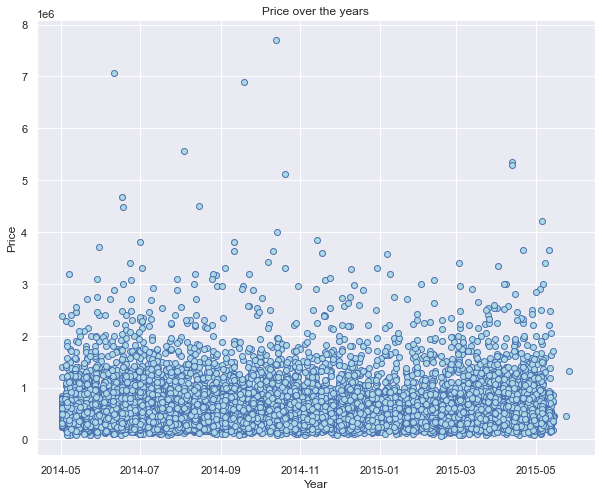

In [523]:
#Lets us plot & see price of particular corresponding year
plt.figure(figsize = (10, 8))
df['dates'] = [pd.to_datetime(d) for d in df['dayhours']]
plt.scatter(df['dates'], df['price'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price over the years')
plt.show()

In [4]:
#shape of the dataset
df.shape

(21613, 23)

In [5]:
#Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [6]:
#check of duplicate records
df.duplicated().sum()

0

In [7]:
#check for missing values
df.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

In [8]:
#dropping the column cid and observing head of dataset
df= df.drop(['cid'], axis = 1)
df.head().T

,0,1,2,3,4
dayhours,20150427T000000,20150317T000000,20140820T000000,20141010T000000,20150218T000000
price,600000,190000,735000,257000,450000
room_bed,4,2,4,3,2
room_bath,1.75,1,2.75,2.5,1
living_measure,3050,670,3040,1740,1120
lot_measure,9440,3101,2415,3721,4590
ceil,1,1,2,2,1
coast,0,0,1,0,0
sight,0,0,4,0,0
condition,3,4,3,3,3


In [9]:
#adding new column sellingdate by formatting dayhours column 
df['sellingdate'] = pd.to_datetime(df.dayhours, format='%Y-%m-%d %H:%M:%S')
#secondly: convert to the desired date format
df['sellingdate']=df['sellingdate'].dt.strftime('%d-%m-%Y')
#print first five rows
df['sellingdate'].head()

0    27-04-2015
1    17-03-2015
2    20-08-2014
3    10-10-2014
4    18-02-2015
Name: sellingdate, dtype: object

In [10]:
df.head().T

,0,1,2,3,4
dayhours,20150427T000000,20150317T000000,20140820T000000,20141010T000000,20150218T000000
price,600000,190000,735000,257000,450000
room_bed,4,2,4,3,2
room_bath,1.75,1,2.75,2.5,1
living_measure,3050,670,3040,1740,1120
lot_measure,9440,3101,2415,3721,4590
ceil,1,1,2,2,1
coast,0,0,1,0,0
sight,0,0,4,0,0
condition,3,4,3,3,3


In [11]:
#dropping dayhours column
df= df.drop(['dayhours'], axis = 1)
df.head().T

,0,1,2,3,4
price,600000,190000,735000,257000,450000
room_bed,4,2,4,3,2
room_bath,1.75,1,2.75,2.5,1
living_measure,3050,670,3040,1740,1120
lot_measure,9440,3101,2415,3721,4590
ceil,1,1,2,2,1
coast,0,0,1,0,0
sight,0,0,4,0,0
condition,3,4,3,3,3
quality,8,6,8,8,7


In [12]:
#summary stats of continuous columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540182.158793,367362.231718,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
room_bed,21505.0,3.371355,0.930289,0.0000,3.000,3.0000,4.000,3.300000e+01
room_bath,21505.0,2.115171,0.770248,0.0000,1.750,2.2500,2.500,8.000000e+00
living_measure,21596.0,2079.860761,918.496121,290.0000,1429.250,1910.0000,2550.000,1.354000e+04
lot_measure,21571.0,15104.583283,41423.619385,520.0000,5040.000,7618.0000,10684.500,1.651359e+06
sight,21556.0,0.234366,0.766438,0.0000,0.000,0.0000,0.000,4.000000e+00
quality,21612.0,7.656857,1.175484,1.0000,7.000,7.0000,8.000,1.300000e+01
ceil_measure,21612.0,1788.366556,828.102535,290.0000,1190.000,1560.0000,2210.000,9.410000e+03
basement,21612.0,291.522534,442.580840,0.0000,0.000,0.0000,560.000,4.820000e+03
yr_renovated,21613.0,84.402258,401.679240,0.0000,0.000,0.0000,0.000,2.015000e+03


<AxesSubplot:>

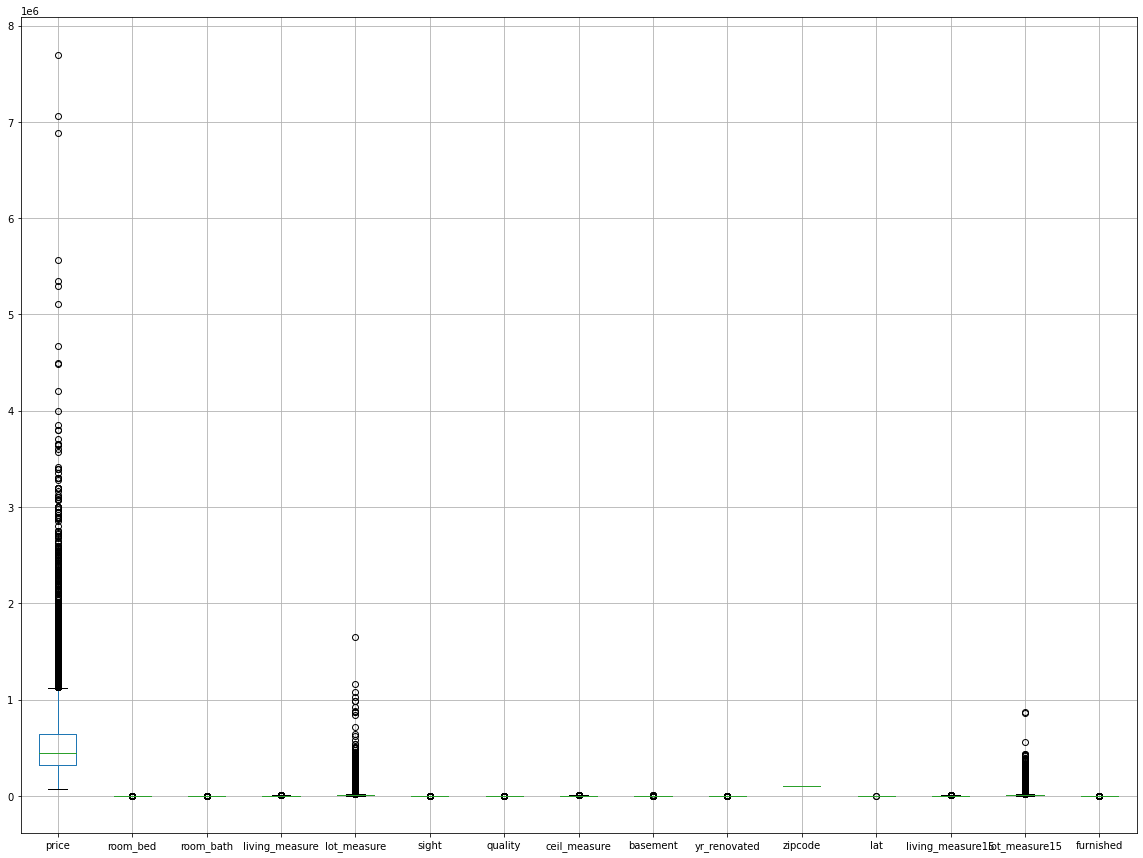

In [13]:
#check for outliers
plt.figure(figsize = (20,15))
df.boxplot()

# Univariate Analysis for continuous columns

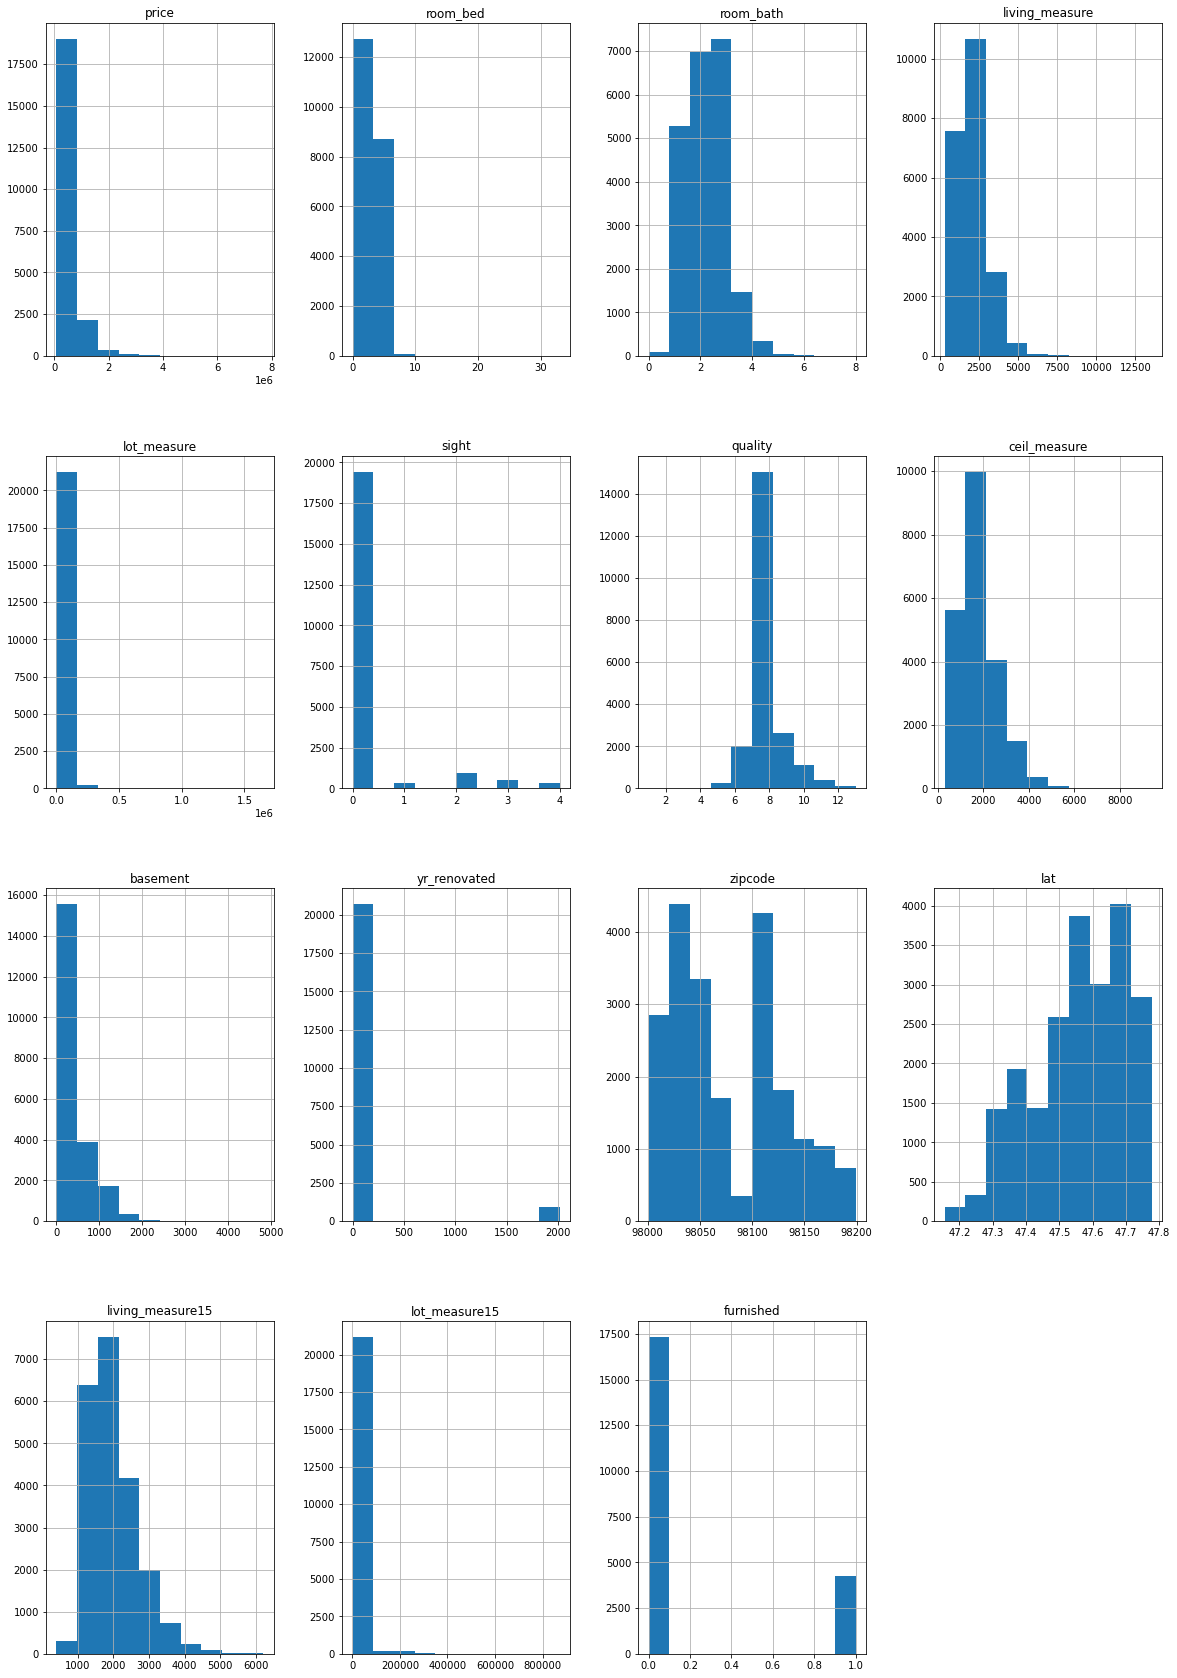

In [14]:
df.hist(figsize=(20,30))
plt.show()

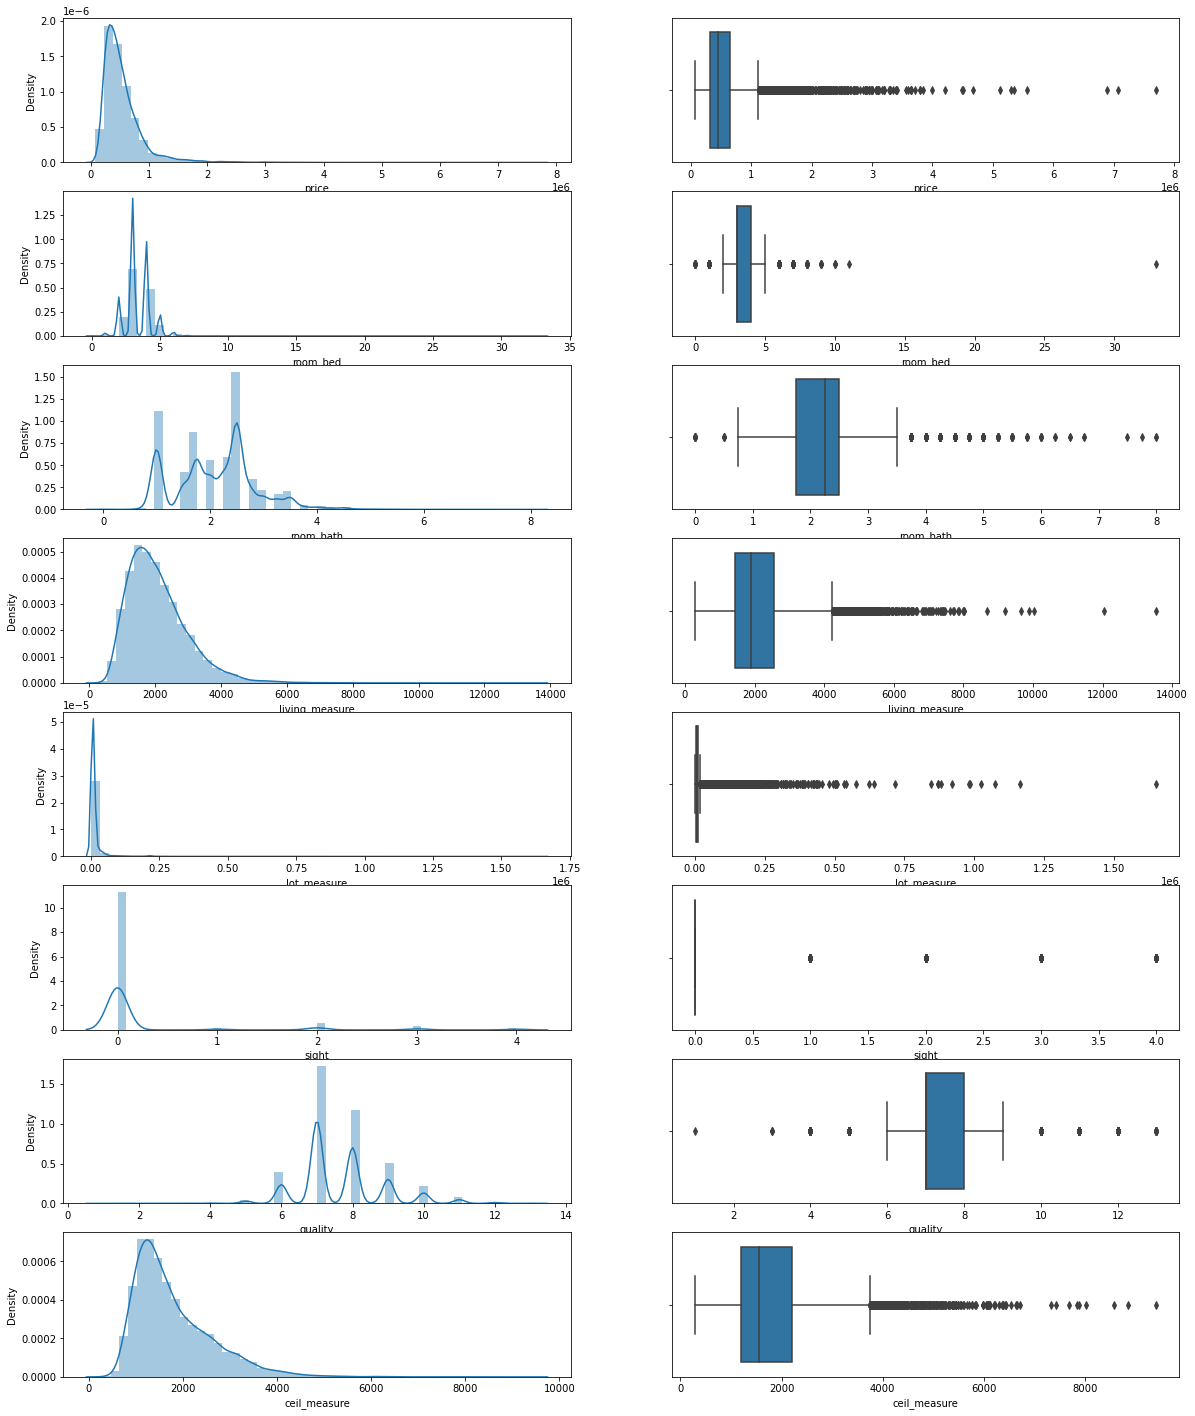

In [15]:
fig, axes = plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(20,25)
a = sns.distplot(df['price'] , ax=axes[0][0])
#a.set_title("price Distribution",fontsize=10)

a = sns.boxplot(df['price'] , orient = "v" , ax=axes[0][1])
#a.set_title("price Boxplot",fontsize=10)

a=sns.distplot(df['room_bed'], ax=axes[1][0])
#a.set_title(" room_bed Distribution",fontsize=10)

a=sns.boxplot(df['room_bed'],orient="v", ax=axes[1][1])
#a.set_title(" room_bed boxplot", fontsize=10)

a=sns.distplot(df['room_bath'], ax=axes[2][0])
#a.set_title("room_bath Distribution",fontsize=10)

a=sns.boxplot(df['room_bath'],orient="v", ax=axes[2][1])
#a.set_title("room_bath boxplot", fontsize=10)

a=sns.distplot(df['living_measure'], ax=axes[3][0])
#a.set_title("living_measure Distribution",fontsize=10)

a=sns.boxplot(df['living_measure'],orient="v", ax=axes[3][1])
#a.set_title("living_measure boxplot", fontsize=10)

a=sns.distplot(df['lot_measure'], ax=axes[4][0])
#a.set_title("lot_measure Distribution",fontsize=10)

a=sns.boxplot(df['lot_measure'],orient="v", ax=axes[4][1])
#a.set_title("lot_measure boxplot", fontsize=10)

a=sns.distplot(df['sight'], ax=axes[5][0])
#a.set_title("sight Distribution",fontsize=10)

a=sns.boxplot(df['sight'],orient="v", ax=axes[5][1])
#a.set_title("sight boxplot", fontsize=10)

a=sns.distplot(df['quality'], ax=axes[6][0])
#a.set_title("sight Distribution",fontsize=10)

a=sns.boxplot(df['quality'],orient="v", ax=axes[6][1])
#a.set_title("sight boxplot", fontsize=10)

a=sns.distplot(df['ceil_measure'], ax=axes[7][0])
#a.set_title("sight Distribution",fontsize=10)

a=sns.boxplot(df['ceil_measure'],orient="v", ax=axes[7][1])
#a.set_title("sight boxplot", fontsize=10)



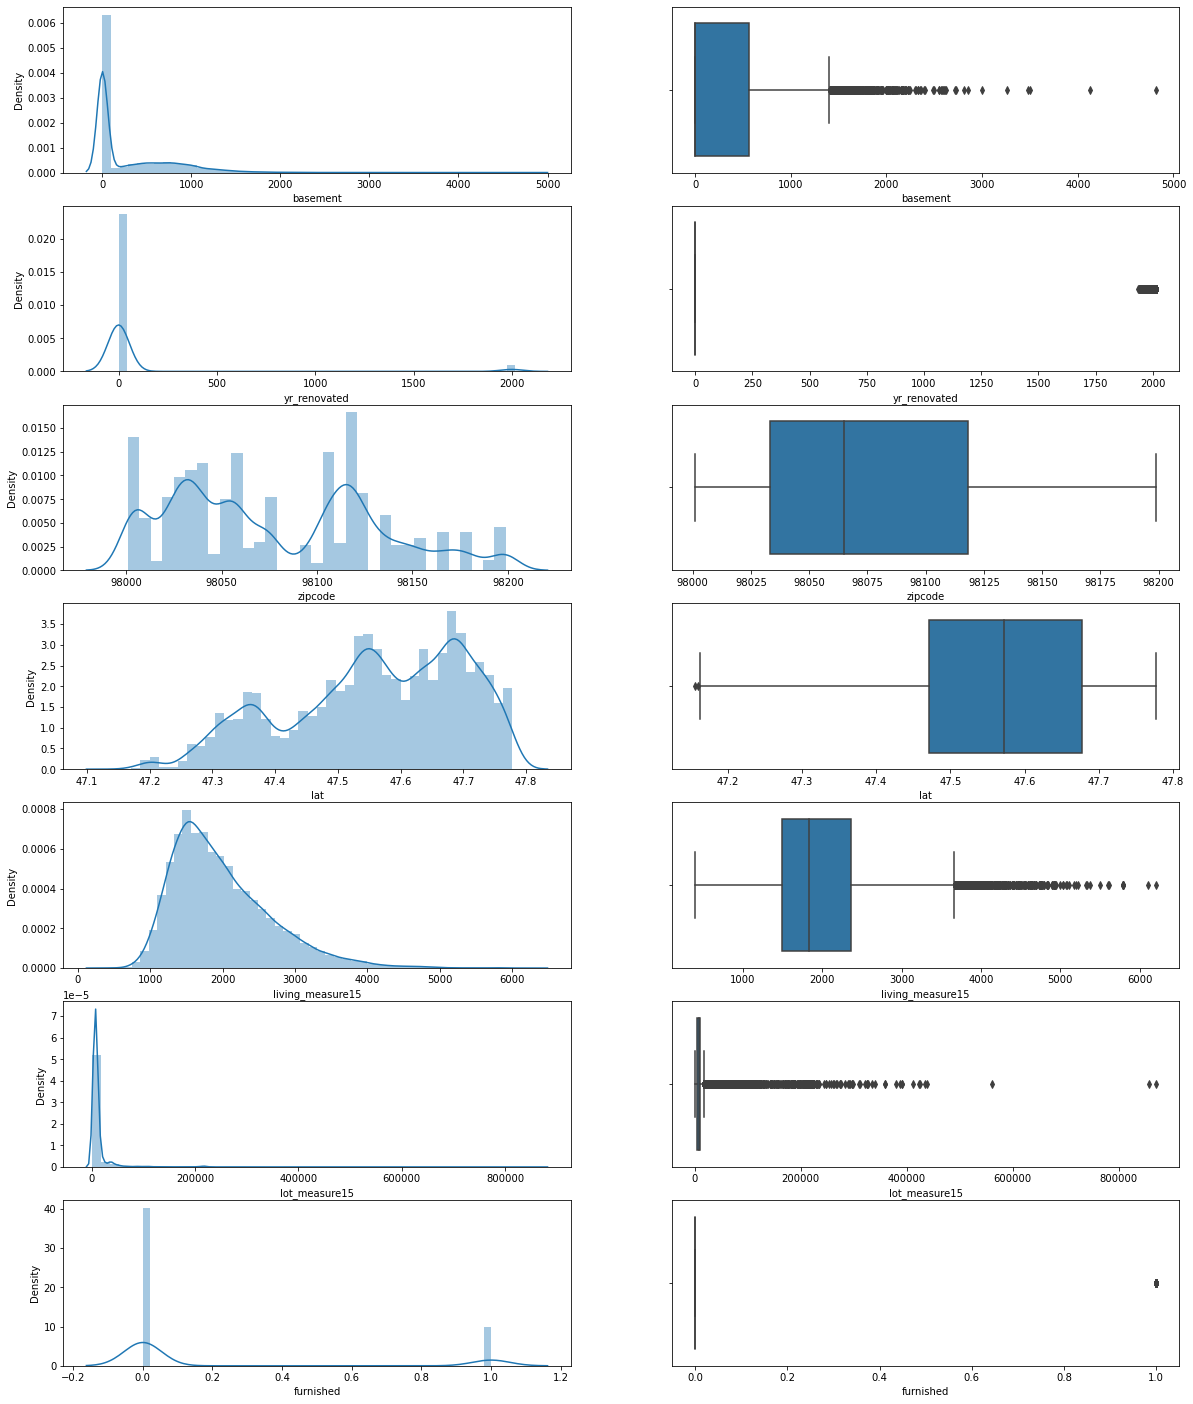

In [16]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(20,25)

a=sns.distplot(df['basement'], ax=axes[0][0])
#a.set_title("room_bath Distribution",fontsize=10)

a=sns.boxplot(df['basement'],orient="v", ax=axes[0][1])
#a.set_title("room_bath boxplot", fontsize=10)

a=sns.distplot(df['yr_renovated'], ax=axes[1][0])
#a.set_title("living_measure Distribution",fontsize=10)

a=sns.boxplot(df['yr_renovated'],orient="v", ax=axes[1][1])
#a.set_title("living_measure boxplot", fontsize=10)

a=sns.distplot(df['zipcode'], ax=axes[2][0])
#a.set_title("lot_measure Distribution",fontsize=10)

a=sns.boxplot(df['zipcode'],orient="v", ax=axes[2][1])
#a.set_title("lot_measure boxplot", fontsize=10)

a=sns.distplot(df['lat'], ax=axes[3][0])
#a.set_title("sight Distribution",fontsize=10)

a=sns.boxplot(df['lat'],orient="v", ax=axes[3][1])
#a.set_title("sight boxplot", fontsize=10)

a = sns.distplot(df['living_measure15'] , ax=axes[4][0])
#a.set_title("price Distribution",fontsize=10)

a = sns.boxplot(df['living_measure15'] , orient = "v" , ax=axes[4][1])
#a.set_title("price Boxplot",fontsize=10)

a=sns.distplot(df['lot_measure15'], ax=axes[5][0])
#a.set_title(" room_bed Distribution",fontsize=10)

a=sns.boxplot(df['lot_measure15'],orient="v", ax=axes[5][1])
#a.set_title(" room_bed boxplot", fontsize=10)

a=sns.distplot(df['furnished'], ax=axes[6][0])
#a.set_title(" room_bed Distribution",fontsize=10)

a=sns.boxplot(df['furnished'],orient="v", ax=axes[6][1])
#a.set_title(" room_bed boxplot", fontsize=10)

# Univariate Analysis for categorical columns

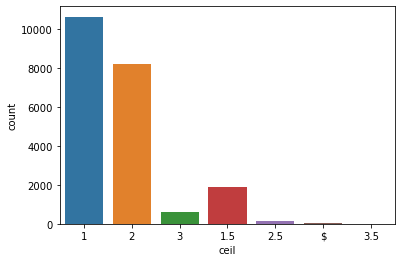

In [17]:
sns.countplot(x=df['ceil'])
plt.show()

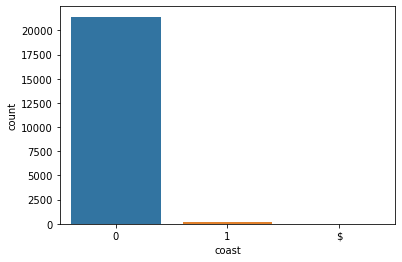

In [18]:
sns.countplot(x=df['coast'])
plt.show()

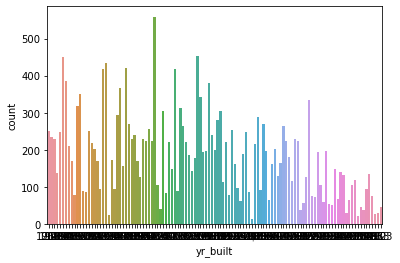

In [19]:
sns.countplot(x=df['yr_built'])
plt.show()

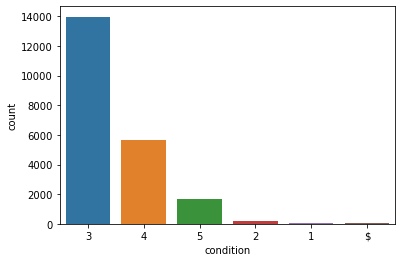

In [20]:
sns.countplot(x=df['condition'])
plt.show()

<AxesSubplot:xlabel='room_bath', ylabel='count'>

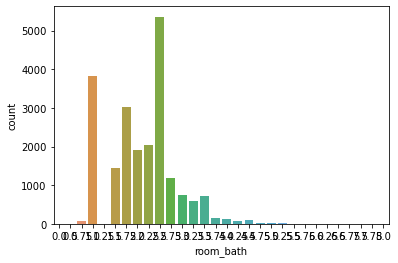

In [21]:
sns.countplot(x="room_bath", data=df)

<AxesSubplot:xlabel='room_bed', ylabel='count'>

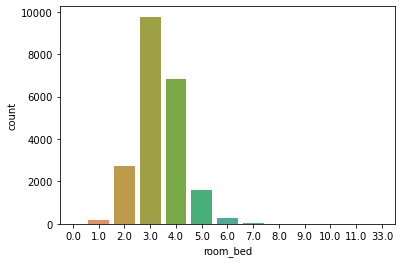

In [22]:
sns.countplot(x="room_bed", data=df)

<AxesSubplot:xlabel='ceil_measure', ylabel='count'>

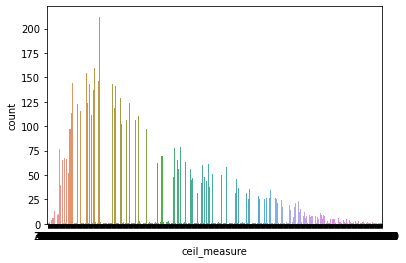

In [23]:
sns.countplot(x="ceil_measure", data=df)

<AxesSubplot:xlabel='sight', ylabel='count'>

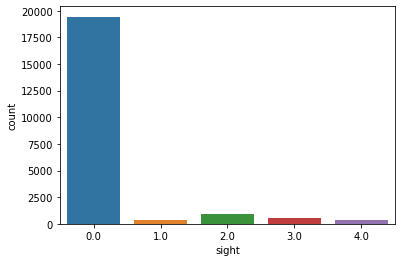

In [24]:
sns.countplot(x="sight", data=df)

<AxesSubplot:xlabel='quality', ylabel='count'>

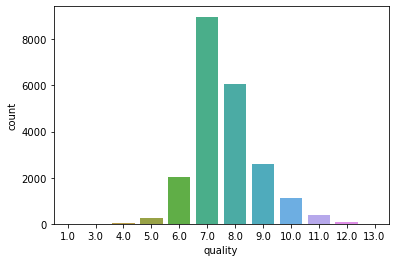

In [25]:
sns.countplot(x="quality", data=df)

<AxesSubplot:xlabel='furnished', ylabel='count'>

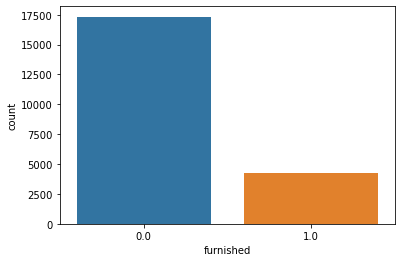

In [26]:
sns.countplot(x="furnished", data=df)

<AxesSubplot:xlabel='living_measure', ylabel='count'>

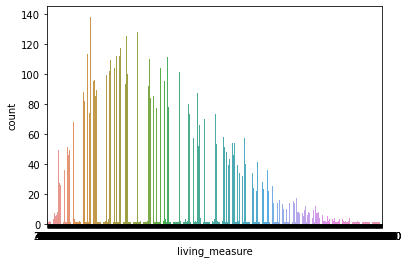

In [27]:
sns.countplot(x="living_measure", data=df)

# Multi variate analysis

In [28]:
corr = df.corr()
corr

,price,room_bed,room_bath,living_measure,lot_measure,sight,quality,ceil_measure,basement,yr_renovated,zipcode,lat,living_measure15,lot_measure15,furnished
price,1.000000,0.308040,0.525179,0.702149,0.089733,0.397522,0.667477,0.605593,0.323825,0.126442,-0.053168,0.306919,0.585186,0.082603,0.566040
room_bed,0.308040,1.000000,0.515778,0.576447,0.032051,0.078367,0.356740,0.477708,0.302569,0.018843,-0.152805,-0.009125,0.390823,0.029484,0.259316
room_bath,0.525179,0.515778,1.000000,0.754617,0.088055,0.186939,0.665037,0.685556,0.283389,0.050194,-0.204149,0.024505,0.568001,0.087096,0.485162
living_measure,0.702149,0.576447,0.754617,1.000000,0.172958,0.284927,0.762723,0.876653,0.435035,0.055253,-0.199646,0.052764,0.756188,0.183548,0.633157
lot_measure,0.089733,0.032051,0.088055,0.172958,1.000000,0.075144,0.113869,0.183656,0.015400,0.007782,-0.129423,-0.086142,0.145653,0.717727,0.119326
sight,0.397522,0.078367,0.186939,0.284927,0.075144,1.000000,0.251095,0.167572,0.277769,0.103078,0.084666,0.006160,0.280976,0.073020,0.219995
quality,0.667477,0.356740,0.665037,0.762723,0.113869,0.251095,1.000000,0.755923,0.168403,0.014417,-0.184854,0.114103,0.713114,0.119360,0.788717
ceil_measure,0.605593,0.477708,0.685556,0.876653,0.183656,0.167572,0.755923,1.000000,-0.051925,0.023291,-0.261171,-0.000784,0.731558,0.194246,0.652616
basement,0.323825,0.302569,0.283389,0.435035,0.015400,0.277769,0.168403,-0.051925,1.000000,0.071317,0.074820,0.110508,0.200068,0.017539,0.092624
yr_renovated,0.126442,0.018843,0.050194,0.055253,0.007782,0.103078,0.014417,0.023291,0.071317,1.000000,0.064357,0.029398,-0.002053,0.007950,0.017330


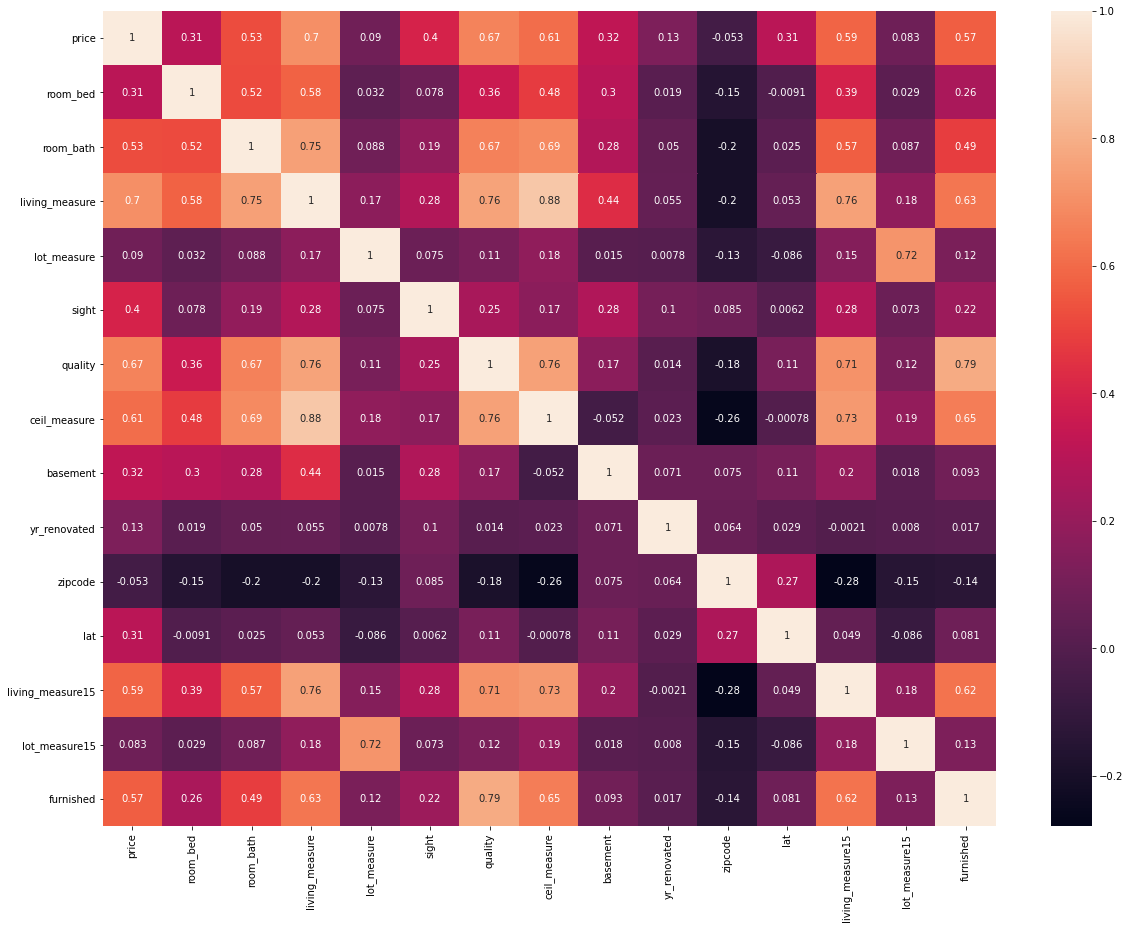

In [29]:
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)
plt.show()

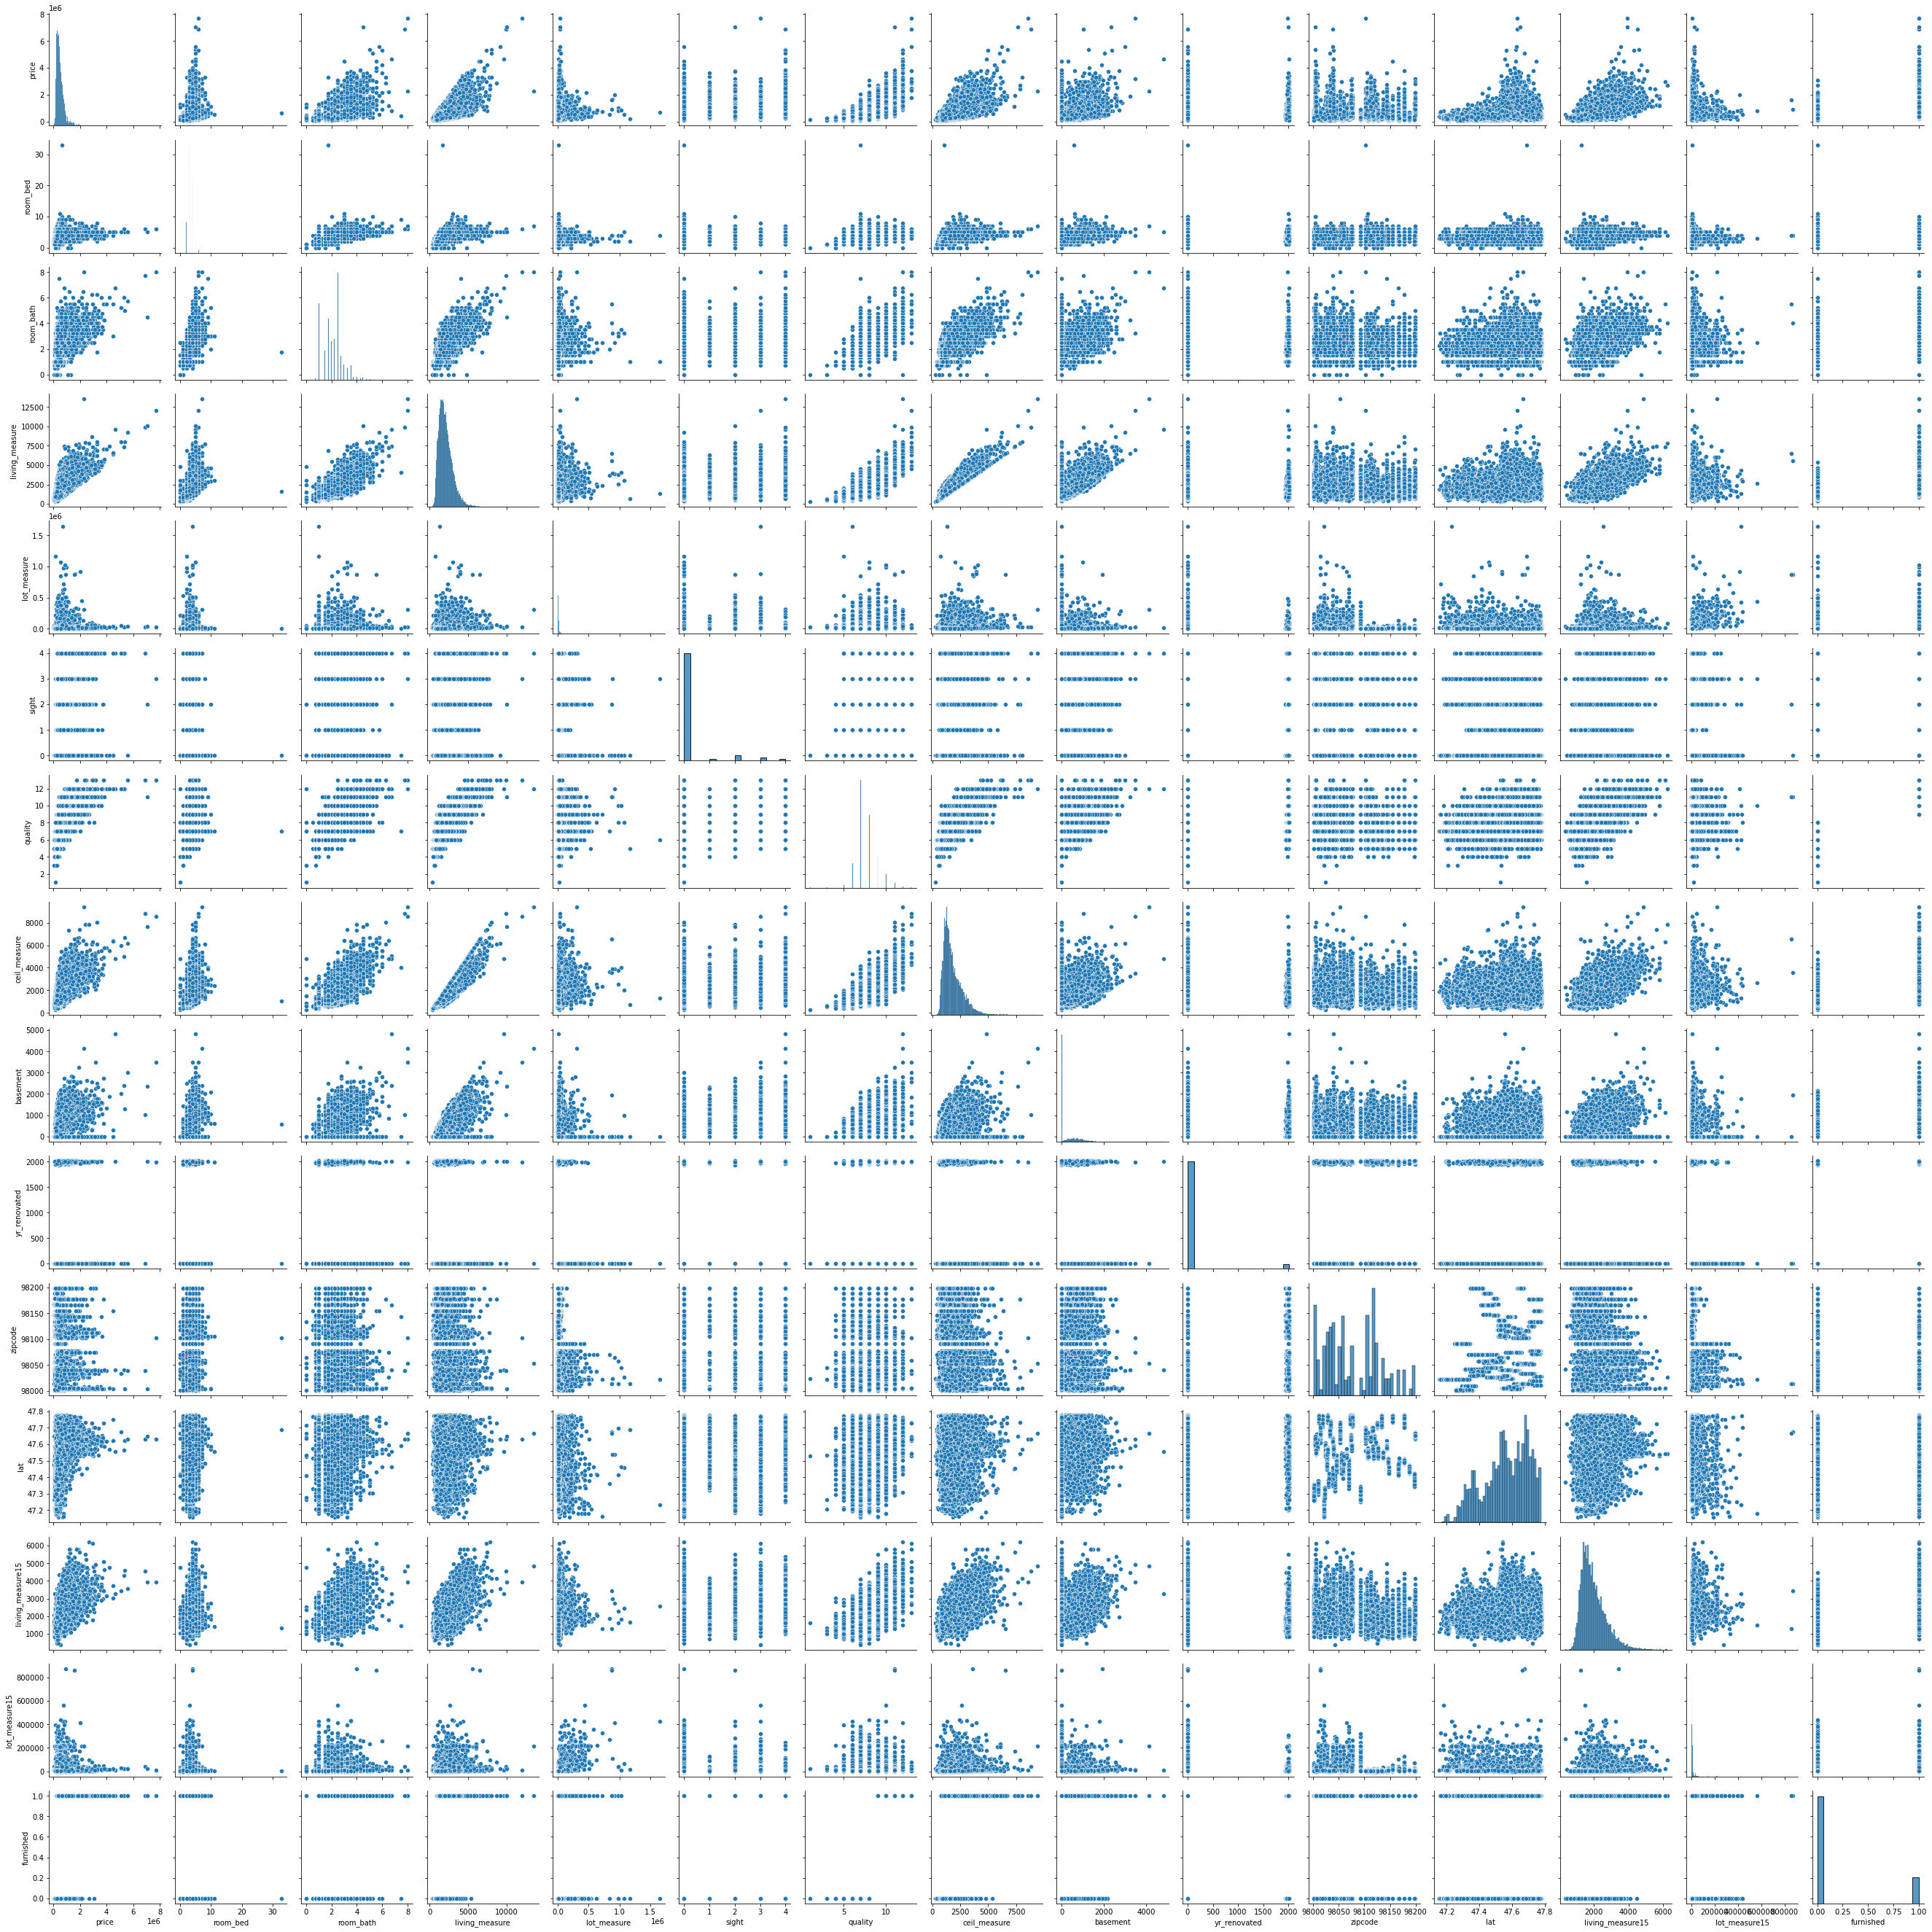

In [30]:
sns.pairplot(df)

In [31]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

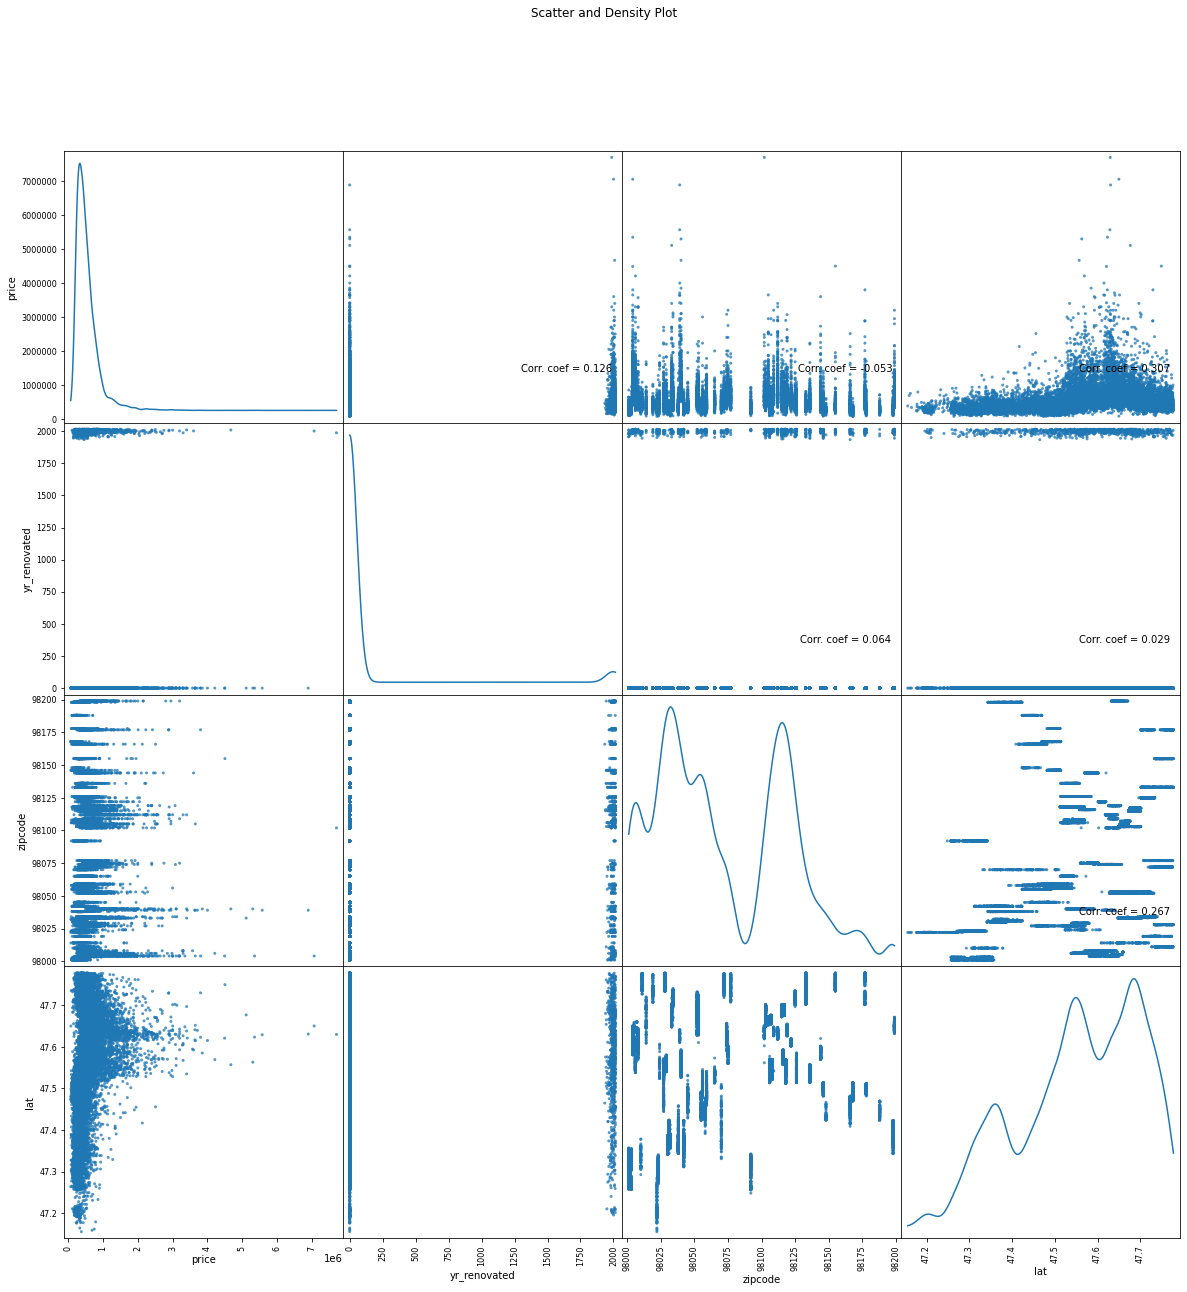

In [32]:
plotScatterMatrix(df, 20, 10)

# Bi-variate Analysis

<AxesSubplot:xlabel='quality', ylabel='price'>

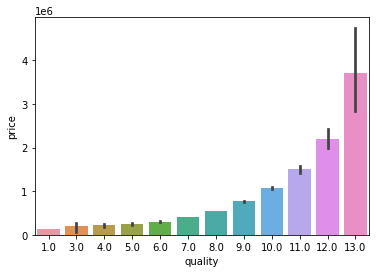

In [33]:
sns.barplot(data = df, x='quality',y='price')

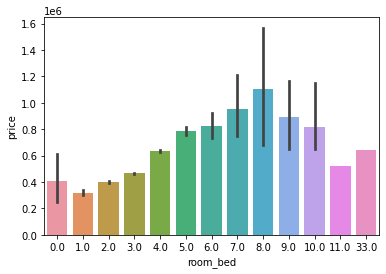

In [34]:
sns.barplot(data = df, x='room_bed',y='price')
plt.show()

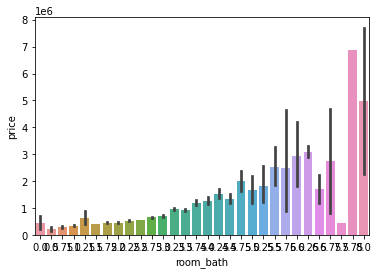

In [35]:
sns.barplot(data = df, x='room_bath',y='price')
plt.show()

<AxesSubplot:xlabel='living_measure', ylabel='price'>

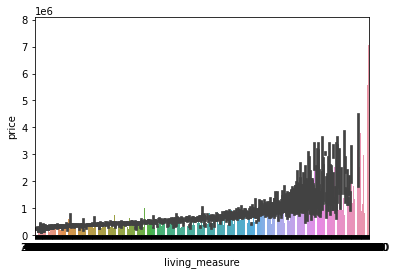

In [36]:
sns.barplot(data = df, x='living_measure',y='price')

<AxesSubplot:xlabel='furnished', ylabel='price'>

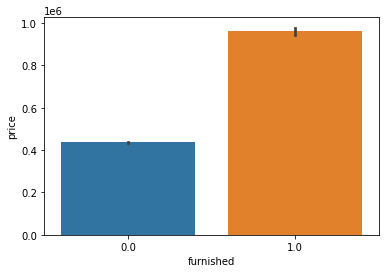

In [37]:
sns.barplot(data = df, x='furnished',y='price')

<AxesSubplot:xlabel='furnished', ylabel='price'>

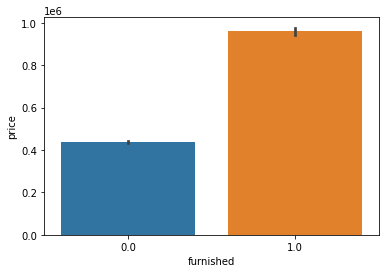

In [38]:
sns.barplot(data = df, x='furnished',y='price')

<AxesSubplot:xlabel='sight', ylabel='price'>

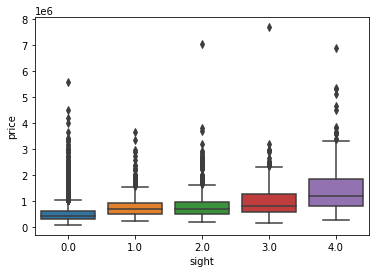

In [39]:
sns.boxplot(data = df, x='sight',y='price')

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

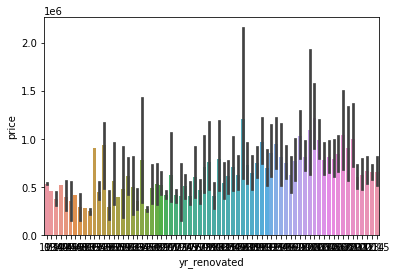

In [40]:
sns.barplot(data = df, x='yr_renovated',y='price')

In [41]:
pd.crosstab(df['quality'], df['price'])

price,75000,78000,80000,81000,82000,82500,83000,84000,85000,86500,...,4490000,4500000,4670000,5110000,5300000,5350000,5570000,6890000,7060000,7700000
quality,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.0,0,1,0,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6.0,0,0,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df[['quality','price']].sort_values(by='price', ascending = True).head(5)

,quality,price
17946,3.0,75000
20344,5.0,78000
10847,4.0,80000
13068,5.0,81000
11003,6.0,82000


In [43]:
df[['quality','price']].sort_values(by='price', ascending = False).head(5)

,quality,price
1068,13.0,7700000
10718,11.0,7060000
10639,13.0,6890000
12794,13.0,5570000
1031,12.0,5350000


In [44]:
pd.crosstab(df['furnished'], df['price'])

price,75000,78000,80000,81000,82000,82500,83000,84000,85000,86500,...,4490000,4500000,4670000,5110000,5300000,5350000,5570000,6890000,7060000,7700000
furnished,,,,,,,,,,,,,,,,,,,,,
0.0,1,1,1,1,1,1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [45]:
df[['furnished','price']].sort_values(by='price', ascending = False).head(5)

,furnished,price
1068,1.0,7700000
10718,1.0,7060000
10639,1.0,6890000
12794,1.0,5570000
1031,1.0,5350000


In [46]:
df[['furnished','price']].sort_values(by='price', ascending = True).head(5)

,furnished,price
17946,0.0,75000
20344,0.0,78000
10847,0.0,80000
13068,0.0,81000
11003,0.0,82000


In [47]:
pd.crosstab(df['sight'], df['price'])

price,75000,78000,80000,81000,82000,82500,83000,84000,85000,86500,...,4490000,4500000,4670000,5110000,5300000,5350000,5570000,6890000,7060000,7700000
sight,,,,,,,,,,,,,,,,,,,,,
0.0,1,1,1,1,1,1,1,1,2,1,...,1,0,0,0,0,0,1,0,0,0
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4.0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,0,1,0,0


In [48]:
df[['sight','price']].sort_values(by='price', ascending = False).head(5)

,sight,price
1068,3.0,7700000
10718,2.0,7060000
10639,4.0,6890000
12794,0.0,5570000
1031,4.0,5350000


In [49]:
df[['sight','price']].sort_values(by='price', ascending = True).head(5)

,sight,price
17946,0.0,75000
20344,0.0,78000
10847,0.0,80000
13068,0.0,81000
11003,0.0,82000


In [50]:
pd.crosstab(df['yr_renovated'], df['price'])

price,75000,78000,80000,81000,82000,82500,83000,84000,85000,86500,...,4490000,4500000,4670000,5110000,5300000,5350000,5570000,6890000,7060000,7700000
yr_renovated,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,2,1,...,1,1,0,1,1,1,1,1,0,0
1934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1945,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df[['yr_renovated','price']].sort_values(by='price', ascending = True).head(5)

,yr_renovated,price
17946,0,75000
20344,0,78000
10847,0,80000
13068,0,81000
11003,0,82000


In [52]:
df[['yr_renovated','price']].sort_values(by='price', ascending = False).head(5)

,yr_renovated,price
1068,1987,7700000
10718,2001,7060000
10639,0,6890000
12794,0,5570000
1031,0,5350000


# check for bad data

In [53]:
cols_to_check = ['room_bed','room_bath','living_measure','lot_measure','ceil','long','coast','condition','quality','ceil_measure','basement','yr_built','living_measure15','lot_measure15','furnished','total_area']
print(df[cols_to_check])

       room_bed  room_bath  living_measure  lot_measure ceil     long coast  \
0           4.0       1.75          3050.0       9440.0    1 -122.183     0   
1           2.0       1.00           670.0       3101.0    1 -122.274     0   
2           4.0       2.75          3040.0       2415.0    2 -122.256     1   
3           3.0       2.50          1740.0       3721.0    2 -122.213     0   
4           2.0       1.00          1120.0       4590.0    1 -122.285     0   
...         ...        ...             ...          ...  ...      ...   ...   
21608       4.0       2.50          3130.0      60467.0    2 -121.962     0   
21609       2.0       1.00          1030.0       4841.0    1 -122.341     0   
21610       3.0       3.75          3710.0      34412.0    2  -122.04     0   
21611       4.0       2.50          1560.0       7800.0    2 -122.316     0   
21612       4.0       2.50          1940.0       4875.0    2 -122.304     0   

      condition  quality  ceil_measure  basement yr

In [54]:
df[cols_to_check] = df[cols_to_check].replace({'$': np.NAN}, regex=True)
print(df)

         price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0       600000       4.0       1.75          3050.0       9440.0   1.0    0.0   
1       190000       2.0       1.00           670.0       3101.0   1.0    0.0   
2       735000       4.0       2.75          3040.0       2415.0   2.0    1.0   
3       257000       3.0       2.50          1740.0       3721.0   2.0    0.0   
4       450000       2.0       1.00          1120.0       4590.0   1.0    0.0   
...        ...       ...        ...             ...          ...   ...    ...   
21608   685530       4.0       2.50          3130.0      60467.0   2.0    0.0   
21609   535000       2.0       1.00          1030.0       4841.0   1.0    0.0   
21610   998000       3.0       3.75          3710.0      34412.0   2.0    0.0   
21611   262000       4.0       2.50          1560.0       7800.0   2.0    0.0   
21612  1150000       4.0       2.50          1940.0       4875.0   2.0    0.0   

       sight  condition  qu

# check and treating outliers

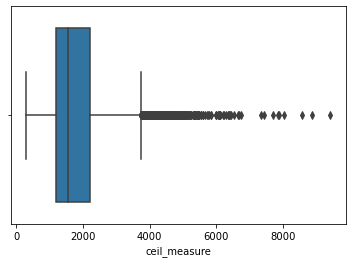

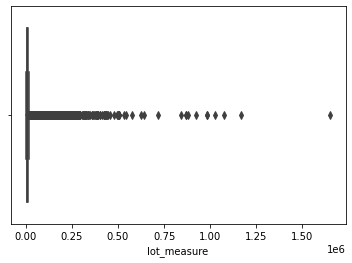

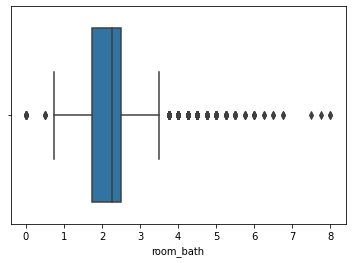

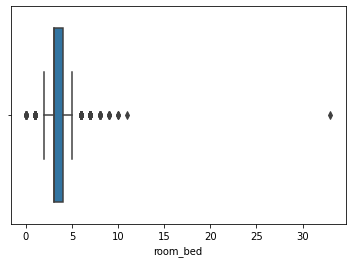

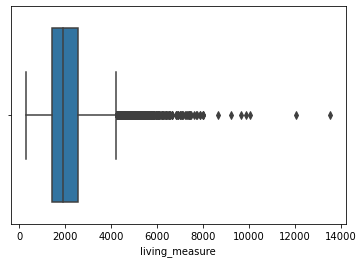

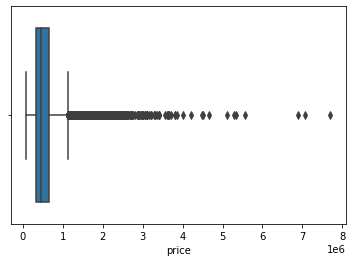

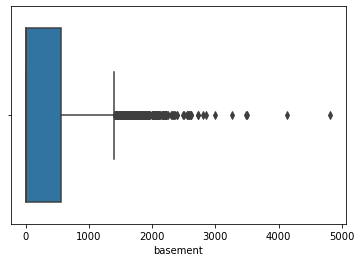

In [55]:
cols = ['ceil_measure' ,'lot_measure', 'room_bath', 'room_bed', 'living_measure','price','basement']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [56]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [57]:
lrcarat,urcarat=remove_outlier(df['basement'])
df['basement']=np.where(df['basement']>urcarat,urcarat,df['basement'])
df['basement']=np.where(df['basement']<lrcarat,lrcarat,df['basement'])

In [58]:
lrcarat,urcarat=remove_outlier(df['price'])
df['price']=np.where(df['price']>urcarat,urcarat,df['price'])
df['price']=np.where(df['price']<lrcarat,lrcarat,df['price'])

In [59]:
lrcarat,urcarat=remove_outlier(df['living_measure'])
df['living_measure']=np.where(df['living_measure']>urcarat,urcarat,df['living_measure'])
df['living_measure']=np.where(df['living_measure']<lrcarat,lrcarat,df['living_measure'])

In [60]:
lrcarat,urcarat=remove_outlier(df['room_bed'])
df['room_bed']=np.where(df['room_bed']>urcarat,urcarat,df['room_bed'])
df['room_bed']=np.where(df['room_bed']<lrcarat,lrcarat,df['room_bed'])

In [61]:
lrcarat,urcarat=remove_outlier(df['room_bath'])
df['room_bath']=np.where(df['room_bath']>urcarat,urcarat,df['room_bath'])
df['room_bath']=np.where(df['room_bath']<lrcarat,lrcarat,df['room_bath'])

In [62]:
lrcarat,urcarat=remove_outlier(df['lot_measure'])
df['lot_measure']=np.where(df['lot_measure']>urcarat,urcarat,df['lot_measure'])
df['lot_measure']=np.where(df['lot_measure']<lrcarat,lrcarat,df['lot_measure'])

In [63]:
lrcarat,urcarat=remove_outlier(df['ceil_measure'])
df['ceil_measure']=np.where(df['ceil_measure']>urcarat,urcarat,df['ceil_measure'])
df['ceil_measure']=np.where(df['ceil_measure']<lrcarat,lrcarat,df['ceil_measure'])

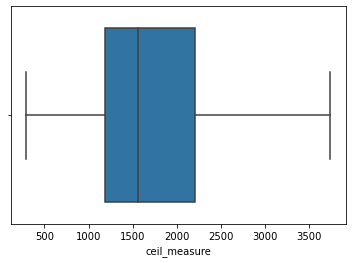

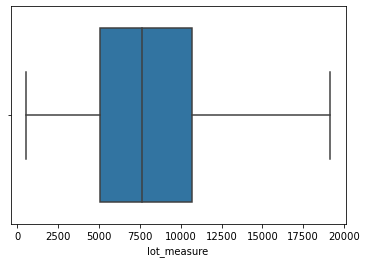

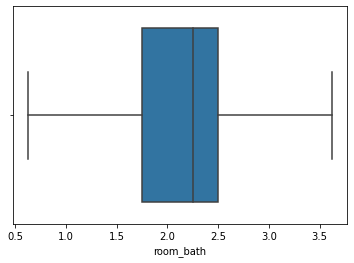

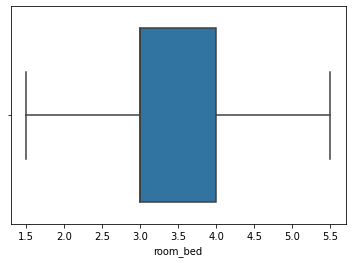

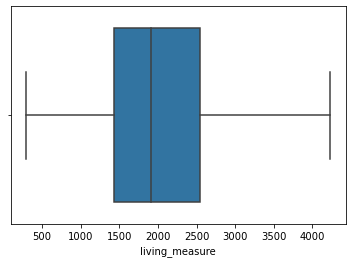

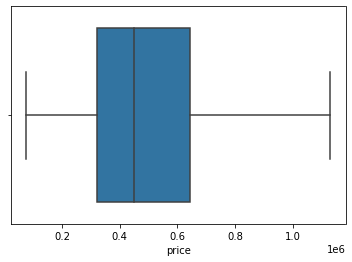

In [64]:
cols = ['ceil_measure' ,'lot_measure', 'room_bath', 'room_bed', 'living_measure','price']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [65]:
df.isna().sum()

price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 72
coast                31
sight                57
condition            85
quality               1
ceil_measure          1
basement              1
yr_built             15
yr_renovated          0
zipcode               0
lat                   0
long                 34
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
sellingdate           0
dtype: int64

In [66]:
#replacing total area null values
x=df['living_measure']+df['lot_measure']
df.total_area.fillna(x, inplace = True)

In [67]:
#replacing living_measure null values
x=df['total_area']-df['lot_measure']
df.living_measure.fillna(x, inplace = True)

In [68]:

#replacing lot_measure null values
x=df['total_area']-df['living_measure']
df.lot_measure.fillna(x, inplace = True)

In [69]:
#replacing living measure 15 null values
x = df["living_measure15"].median()

df["living_measure15"].fillna(x, inplace = True)

In [70]:
#replacing room bed null values
x = df["room_bed"].mode()[0]

df["room_bed"].fillna(x, inplace = True)

In [71]:
#replacing room bath null values
x = df["room_bath"].mode()[0]

df["room_bath"].fillna(x, inplace = True)

In [72]:
#replacing sight null values
x = df["sight"].mode()[0]

df["sight"].fillna(x, inplace = True)

In [73]:
#replacing furnished null values
x = df["furnished"].mode()[0]

df["furnished"].fillna(x, inplace = True)

In [74]:
#replacing condition null values
x = df["condition"].mode()[0]

df["condition"].fillna(x, inplace = True)

In [75]:
#replacing ceil null values
x = df["ceil"].mode()[0]

df["ceil"].fillna(x, inplace = True)

In [76]:
#replacing coast null values
x = df["coast"].mode()[0]

df["coast"].fillna(x, inplace = True)

In [77]:
df.isnull().sum()

price                0
room_bed             0
room_bath            0
living_measure       0
lot_measure          0
ceil                 0
coast                0
sight                0
condition            0
quality              1
ceil_measure         1
basement             1
yr_built            15
yr_renovated         0
zipcode              0
lat                  0
long                34
living_measure15     0
lot_measure15       29
furnished            0
total_area           0
sellingdate          0
dtype: int64

In [78]:
df.dropna(inplace=True)
df.isna().sum()

price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
sellingdate         0
dtype: int64

In [79]:
df['coast'] = df['coast'].astype(str)
df['sight'] = df['sight'].astype(str)
df['condition'] = df['condition'].astype(str)
df['quality'] = df['quality'].astype(str)
df['furnished'] = df['furnished'].astype(str)

In [80]:
#Binning Basement to analyse data
def create_havingbasement_group(series):
    if series == 0:
        return "No"
    elif series > 0:
        return "Yes"
    
df['having_basement'] = df['basement'].apply(create_havingbasement_group)

In [81]:
#Binning Basement to analyse data
def create_renovated_group(series):
    if series == 0:
        return "No"
    elif series > 0:
        return "Yes"
    
df['renovated'] = df['yr_renovated'].apply(create_renovated_group)

In [82]:
df.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area',
       'sellingdate', 'having_basement', 'renovated'],
      dtype='object')

In [83]:
df_model=df.copy()
df_model.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area',
       'sellingdate', 'having_basement', 'renovated'],
      dtype='object')

In [84]:
df_model1= df_model.drop(['yr_renovated','lat','long'], axis = 1)
df_model1.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'zipcode', 'living_measure15', 'lot_measure15',
       'furnished', 'total_area', 'sellingdate', 'having_basement',
       'renovated'],
      dtype='object')

In [85]:
df_model1.shape

(21535, 21)

Normalizing and Scaling
Often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100. For e.g. in our data set Income is having values in thousands and age in just two digits. Since the data in these variables are of different scales, it is tough to compare these variables.

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

In this method, we convert variables with different scales of measurements into a single scale.

StandardScaler normalizes the data using the formula (x-mean)/standard deviation.

We will be doing this only for the numerical variables.

#Scales the data. Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale
StandardScaler(copy=True, with_mean=True, with_std=True)
df_model1['price'] = std_scale.fit_transform(df_model1[['price']])
df_model1['room_bed'] = std_scale.fit_transform(df_model1[['room_bed']])
df_model1['room_bath'] = std_scale.fit_transform(df_model1[['room_bath']])
df_model1['living_measure']= std_scale.fit_transform(df_model1[['living_measure']])
df_model1['lot_measure'] = std_scale.fit_transform(df_model1[['lot_measure']])
df_model1['ceil'] = std_scale.fit_transform(df_model1[['ceil']])
df_model1['ceil_measure']= std_scale.fit_transform(df_model1[['ceil_measure']])
df_model1['basement'] = std_scale.fit_transform(df_model1[['basement']])
df_model1['yr_built'] = std_scale.fit_transform(df_model1[['yr_built']])
df_model1['zipcode'] = std_scale.fit_transform(df_model1[['zipcode']])
df_model1['lot_measure15'] = std_scale.fit_transform(df_model1[['lot_measure15']])
df_model1['living_measure15'] = std_scale.fit_transform(df_model1[['living_measure15']])
df_model1['total_area'] = std_scale.fit_transform(df_model1[['total_area']])

In [86]:
df_model1.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'zipcode', 'living_measure15', 'lot_measure15',
       'furnished', 'total_area', 'sellingdate', 'having_basement',
       'renovated'],
      dtype='object')

ENCODING
One-Hot-Encoding is used to create dummy variables to replace the categories in a categorical variable into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical value in the record.

This is required to do since the machine learning algorithms only works on the numerical data. That is why there is a need to convert the categorical column into numerical one.

get_dummies is the method which creates dummy variable for each categorical variable.

It is considered a good practice to set parameter drop_first as True whenever get_dummies is used. It reduces the chances of multicollinearity which will be covered in coming courses and the number of features are also less as compared to drop_first=False

In [87]:
dummies=pd.get_dummies(df_model1, columns=["coast","sight", "condition","quality","furnished","having_basement","renovated"],drop_first=True)

In [88]:
dummies.head().T

,0,1,2,3,4
price,600000,190000,735000,257000,450000
room_bed,4,2,4,3,2
room_bath,1.75,1,2.75,2.5,1
living_measure,3050,670,3040,1740,1120
lot_measure,9440,3101,2415,3721,4590
ceil,1,1,2,2,1
ceil_measure,1800,670,3040,1740,1120
basement,1250,0,0,0,0
yr_built,1966,1948,1966,2009,1924
zipcode,98034,98118,98118,98002,98118


In [107]:
dummies.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'ceil_measure', 'basement', 'yr_built', 'zipcode',
       'living_measure15', 'lot_measure15', 'total_area', 'coast_1.0',
       'sight_1.0', 'sight_2.0', 'sight_3.0', 'sight_4.0', 'condition_2.0',
       'condition_3.0', 'condition_4.0', 'condition_5.0', 'quality_10.0',
       'quality_11.0', 'quality_12.0', 'quality_13.0', 'quality_3.0',
       'quality_4.0', 'quality_5.0', 'quality_6.0', 'quality_7.0',
       'quality_8.0', 'quality_9.0', 'furnished_1.0', 'having_basement_Yes',
       'renovated_Yes'],
      dtype='object')

In [90]:
#let's drop the sellingdate column as we already analyzed it
dummies=dummies.drop(['sellingdate'],axis=1)
#Creating X, y for training and testing set
X = dummies.drop("price" , axis=1)
y = dummies["price"]

In [176]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [178]:
X_train.shape

(15074, 35)

In [179]:
y_test.head()

9580     1129575.0
14998     595000.0
4366      479000.0
5712      435000.0
1230      338150.0
Name: price, dtype: float64

In [180]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(X_train)
x_test_scaled=ss.transform(X_test)

# Make 4 models using ANN, Decision Tree, Random Forest, and Linear Regression

Check Train and Test RMSE
Check Train and Test Scores

In [181]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mse_train=[]
mse_test=[]
mae_train=[]
mae_test=[]

for i in models: 
    #if (i != annr) :
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
        mse_train.append(mean_squared_error(y_train, i.predict(X_train)))
        mse_test.append(mean_squared_error(y_test,i.predict(X_test)))
        mae_train.append(mean_absolute_error(y_train, i.predict(X_train)))
        mae_test.append(mean_absolute_error(y_test,i.predict(X_test)))
 
    
        
        
        

Compa_df=pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'R2 on Train data':scores_train,'R2 on Test data': scores_test,'Train MSE': mse_train,'Test MSE': mse_test,'Train MAE': mae_train,'Test MAE': mae_test},
            index=['Multi  Linear Regression','Decision Tree Regressor','Random Forest Regressor','ANN Regressor'])
Compa_df

,Train RMSE,Test RMSE,R2 on Train data,R2 on Test data,Train MSE,Test MSE,Train MAE,Test MAE
Multi Linear Regression,141168.225715,141866.204975,0.680193,0.680631,1.992847e+10,2.012602e+10,108002.123043,109387.166047
Decision Tree Regressor,9131.966774,147203.099414,0.998662,0.656151,8.339282e+07,2.166875e+10,778.130224,98829.214286
Random Forest Regressor,39806.137407,105350.290338,0.974572,0.823881,1.584529e+09,1.109868e+10,27052.337707,72813.309907
ANN Regressor,158141.863896,159241.708787,0.598665,0.597609,2.500885e+10,2.535792e+10,121664.313609,122539.705644


else :
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_tra, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        mse_train.append(mean_squared_error(y_train, i.predict(x_train_scaled)))
        mse_test.append(mean_squared_error(y_test,i.predict(x_test_scaled)))
        mae_train.append(mean_absolute_error(y_train, i.predict(x_train_scaled)))
        mae_test.append(mean_absolute_error(y_test,i.predict(x_test_scaled)))

In [182]:
LR1 = LinearRegression()
LR1.fit(X_train, y_train)
#predicting result over test data
y_LR1_predtr= LR1.predict(X_train)
y_LR1_predvl= LR1.predict(X_test)

LR1.coef_


array([-1.31840091e+04,  2.51386728e+04,  1.25279794e+01, -3.52414940e+00,
        3.12447370e+04,  6.36858436e+01,  5.35556767e+01, -2.63519172e+03,
        3.44305996e+01,  5.81760533e+01, -8.35616887e-02,  1.87093648e-01,
        9.46128287e+04,  8.12912721e+04,  4.32243859e+04,  6.32203971e+04,
        1.24860028e+05, -1.30176435e+04,  2.62426270e+04,  4.18682266e+04,
        7.70974286e+04,  6.36675540e+04,  1.40056538e+05,  1.21368104e+05,
        3.33331543e+04, -1.92325484e+04, -7.92320093e+04, -8.81635786e+04,
       -3.90417882e+04,  4.31923490e+04,  1.39735657e+05, -4.49431616e+04,
        3.13482188e+05,  3.49586328e+04,  2.50553078e+04])

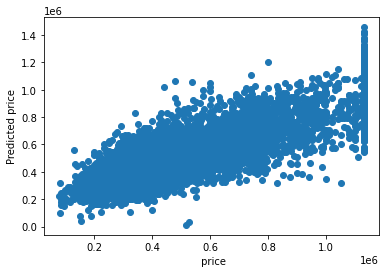

In [183]:
y_pred=LR1.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel(' price')
plt.ylabel('Predicted price')
plt.show()

In [184]:
#Creating a regularized RIDGE model and note the coefficients
Ridge1 = Ridge(alpha=.2727)
Ridge1.fit(X_train,y_train)
print ("Ridge model \n", (Ridge1.coef_))

Ridge model 
 [-1.31929817e+04  2.51556251e+04  1.25249957e+01 -3.52537039e+00
  3.12455266e+04  6.37655841e+01  5.35981019e+01 -2.63495863e+03
  3.46493819e+01  5.82123900e+01 -8.36359867e-02  1.87170177e-01
  9.44641068e+04  8.11629369e+04  4.32000503e+04  6.31694251e+04
  1.24791119e+05 -1.33444464e+04  2.59663883e+04  4.15953264e+04
  7.68009694e+04  5.95498939e+04  1.35779460e+05  1.16671627e+05
  2.81491780e+04 -4.15466097e+04 -1.03885445e+05 -1.14148339e+05
 -6.52188100e+04  1.69498943e+04  1.13430557e+05 -4.89843047e+04
  2.91165854e+05  3.49774951e+04  2.50579433e+04]


In [185]:
#Model score and Deduction for each Model in a DataFrame
Ridge1_trscore=Ridge1.score(X_train, y_train)
Ridge1_trRMSE=np.sqrt(mean_squared_error(y_train, Ridge1.predict(X_train)))
Ridge1_trMSE=mean_squared_error(y_train, Ridge1.predict(X_train))
Ridge1_trMAE=mean_absolute_error(y_train, Ridge1.predict(X_train))


Ridge1_testscore=Ridge1.score(X_test, y_test)
Ridge1_testRMSE=np.sqrt(mean_squared_error(y_test, Ridge1.predict(X_test)))
Ridge1_testMSE=mean_squared_error(y_test, Ridge1.predict(X_test))
Ridge1_testMAE=mean_absolute_error(y_test, Ridge1.predict(X_test))


Ridge1_df=pd.DataFrame({'Train RMSE': Ridge1_trRMSE,'Test RMSE': Ridge1_testRMSE,'R2 on Train data':Ridge1_trscore,'R2 on Test data': Ridge1_testscore,'Train MSE': Ridge1_trMSE,'Test MSE': Ridge1_testMSE,'Train MAE': Ridge1_trMAE,'Test MAE': Ridge1_testMAE},
            index=['Ridge Score'])
Compa_df = pd.concat([Compa_df, Ridge1_df])

Compa_df

,Train RMSE,Test RMSE,R2 on Train data,R2 on Test data,Train MSE,Test MSE,Train MAE,Test MAE
Multi Linear Regression,141168.225715,141866.204975,0.680193,0.680631,1.992847e+10,2.012602e+10,108002.123043,109387.166047
Decision Tree Regressor,9131.966774,147203.099414,0.998662,0.656151,8.339282e+07,2.166875e+10,778.130224,98829.214286
Random Forest Regressor,39806.137407,105350.290338,0.974572,0.823881,1.584529e+09,1.109868e+10,27052.337707,72813.309907
ANN Regressor,158141.863896,159241.708787,0.598665,0.597609,2.500885e+10,2.535792e+10,121664.313609,122539.705644
Ridge Score,141168.428170,141866.117604,0.680193,0.680632,1.992853e+10,2.012600e+10,108004.941278,109388.514340


In [186]:
Ridge2_df=pd.DataFrame({'Train RMSE': Ridge1_trRMSE,'Test RMSE': Ridge1_testRMSE,'R2 on Train data':Ridge1_trscore,'R2 on Test data': Ridge1_testscore,'Train MSE': Ridge1_trMSE,'Test MSE': Ridge1_testMSE,'Train MAE': Ridge1_trMAE,'Test MAE': Ridge1_testMAE},
            index=['Ridge Score'])
Ridge2_df

,Train RMSE,Test RMSE,R2 on Train data,R2 on Test data,Train MSE,Test MSE,Train MAE,Test MAE
Ridge Score,141168.42817,141866.117604,0.680193,0.680632,1.992853e+10,2.012600e+10,108004.941278,109388.51434


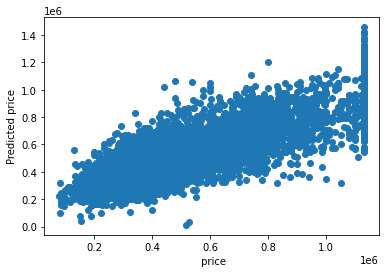

In [187]:
y_pred=Ridge1.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel(' price')
plt.ylabel('Predicted price')
plt.show()

In [188]:
#Create a regularized LASSO model and note the coefficients

Lasso1 = Lasso(alpha=0.00001)
Lasso1.fit(X_train, y_train)

#predicting result over test data
#y_Lasso1_predtr= Lasso1.predict(X_train)
#y_Lasso1_predvl= Lasso1.predict(X_val)
print ("Lasso model \n", (Lasso1.coef_))

Lasso model 
 [-1.31794188e+04  2.51555673e+04  1.25289161e+01 -3.52835762e+00
  3.12211972e+04  6.37416277e+01  5.35445029e+01 -2.63551744e+03
  3.46132671e+01  5.81760471e+01 -8.36689584e-02  1.87294919e-01
  9.46350777e+04  8.13065405e+04  4.32213371e+04  6.32179763e+04
  1.24906058e+05 -7.66293589e+03  3.16210898e+04  4.72476329e+04
  8.24622376e+04  2.60530672e+05  3.36899435e+05  3.18196992e+05
  2.30150690e+05 -1.49466584e+05 -2.09234709e+05 -2.18226882e+05
 -1.69341962e+05 -8.71474178e+04  9.38194490e+03  1.51965950e+05
 -1.38008877e+04  3.49768699e+04  2.50429727e+04]


In [189]:
#Model score and Deduction for each Model in a DataFrame
Lasso1_trscore=Lasso1.score(X_train, y_train)
Lasso1_trRMSE=np.sqrt(mean_squared_error(y_train, Lasso1.predict(X_train)))
Lasso1_trMSE=mean_squared_error(y_train, Lasso1.predict(X_train))
Lasso1_trMAE=mean_absolute_error(y_train, Lasso1.predict(X_train))


Lasso1_testscore=Lasso1.score(X_test, y_test)
Lasso1_testRMSE=np.sqrt(mean_squared_error(y_test, Lasso1.predict(X_test)))
Lasso1_testMSE=mean_squared_error(y_test, Lasso1.predict(X_test))
Lasso1_testMAE=mean_absolute_error(y_test, Lasso1.predict(X_test))



Lasso1_df=pd.DataFrame({'Train RMSE': Lasso1_trRMSE,'Test RMSE': Lasso1_testRMSE,'R2 on Train data':Lasso1_trscore,'R2 on Test data': Lasso1_testscore,'Train MSE': Lasso1_trMSE,'Test MSE': Lasso1_testMSE,'Train MAE': Lasso1_trMAE,'Test MAE': Lasso1_testMAE},
            index=['Lasso'])
Compa_df = pd.concat([Compa_df, Lasso1_df])

Compa_df

,Train RMSE,Test RMSE,R2 on Train data,R2 on Test data,Train MSE,Test MSE,Train MAE,Test MAE
Multi Linear Regression,141168.225715,141866.204975,0.680193,0.680631,1.992847e+10,2.012602e+10,108002.123043,109387.166047
Decision Tree Regressor,9131.966774,147203.099414,0.998662,0.656151,8.339282e+07,2.166875e+10,778.130224,98829.214286
Random Forest Regressor,39806.137407,105350.290338,0.974572,0.823881,1.584529e+09,1.109868e+10,27052.337707,72813.309907
ANN Regressor,158141.863896,159241.708787,0.598665,0.597609,2.500885e+10,2.535792e+10,121664.313609,122539.705644
Ridge Score,141168.428170,141866.117604,0.680193,0.680632,1.992853e+10,2.012600e+10,108004.941278,109388.514340
Lasso,141172.050248,141861.135014,0.680176,0.680654,1.992955e+10,2.012458e+10,108007.901738,109384.889813


In [190]:
Lasso2_df=pd.DataFrame({'Train RMSE': Lasso1_trRMSE,'Test RMSE': Lasso1_testRMSE,'R2 on Train data':Lasso1_trscore,'R2 on Test data': Lasso1_testscore,'Train MSE': Lasso1_trMSE,'Test MSE': Lasso1_testMSE,'Train MAE': Lasso1_trMAE,'Test MAE': Lasso1_testMAE},
            index=['Lasso'])
Lasso2_df

,Train RMSE,Test RMSE,R2 on Train data,R2 on Test data,Train MSE,Test MSE,Train MAE,Test MAE
Lasso,141172.050248,141861.135014,0.680176,0.680654,1.992955e+10,2.012458e+10,108007.901738,109384.889813


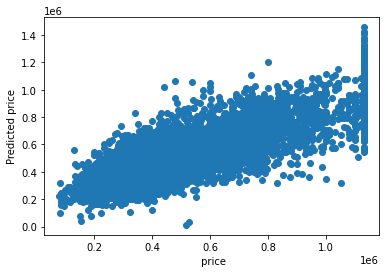

In [191]:
y_pred=Lasso1.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel(' price')
plt.ylabel('Predicted price')
plt.show()

In [192]:
#Let us compare their scores
print("Simple Linear Regression Model--Train set",regression_model.score(X_train, y_train),'\n')
print("Simple Linear Regression Model--Train set",regression_model.score(X_test, y_test),'\n')

print("Ridge Score Model--Train set",Ridge1.score(X_train, y_train),'\n')
print("Ridge Score Model--Test set",Ridge1.score(X_test, y_test),'\n')

print("Lasso Model--Train set",Lasso1.score(X_train, y_train),'\n')
print("Lasso Model--Test set",Lasso1.score(X_test, y_test),'\n')

Simple Linear Regression Model--Train set 0.680193426552048 

Simple Linear Regression Model--Train set 0.6806313019024145 

Ridge Score Model--Train set 0.6801925092596551 

Ridge Score Model--Test set 0.6806316952807727 

Lasso Model--Train set 0.6801760979021305 

Lasso Model--Test set 0.6806541284497438 



The Simple linear regression model,Ridge and Lasso model performed with scores 0.68 & 0.66 in training data set and test data set respectively.

In the Ridge and Lasso model the coefficeints of variables are all non-zero,which indicates that there is no variable to be dropped.

Linear Regression models have performed almost with similar results in both regularized model and non-regularized models.

Linear Regression models have performed well when compared to Random forest and Decision tree models.

Both Random Forest and decision tree are overfit in train set.

ANN train and test dataset are underfit.


# Ensemble techniques
# Boosting and Bagging

In [193]:
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor

In [210]:
GB1=GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1, random_state=22)
GB1
GB1.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=22)

In [195]:



y_GB1_predtr= GB1.predict(X_train)
y_GB1_predvl= GB1.predict(X_test)

#Model score and Deduction for each Model in a DataFrame
GB1_trscore=GB1.score(X_train,y_train)
GB1_trRMSE=np.sqrt(mean_squared_error(y_train, GB1.predict(X_train)))
GB1_trMSE=mean_squared_error(y_train, GB1.predict(X_train))
GB1_trMAE=mean_absolute_error(y_train, GB1.predict(X_train))

GB1_testscore=GB1.score(X_test,y_test)
GB1_testRMSE=np.sqrt(mean_squared_error(y_test, GB1.predict(X_test)))
GB1_testMSE=mean_squared_error(y_test, GB1.predict(X_test))
GB1_testMAE=mean_absolute_error(y_test, GB1.predict(X_test))

GB1_df=pd.DataFrame({'Train RMSE': GB1_trRMSE,'Test RMSE': GB1_testRMSE,'R2 on Train data':GB1_trscore,'R2 on Test data': GB1_testscore,'Train MSE': GB1_trMSE,'Test MSE': GB1_testMSE,'Train MAE': GB1_trMAE,'Test MAE': GB1_testMAE},
            index=['Gradient Boosting'])
Compa_df = pd.concat([Compa_df, GB1_df])

Compa_df

,Train RMSE,Test RMSE,R2 on Train data,R2 on Test data,Train MSE,Test MSE,Train MAE,Test MAE
Multi Linear Regression,141168.225715,141866.204975,0.680193,0.680631,1.992847e+10,2.012602e+10,108002.123043,109387.166047
Decision Tree Regressor,9131.966774,147203.099414,0.998662,0.656151,8.339282e+07,2.166875e+10,778.130224,98829.214286
Random Forest Regressor,39806.137407,105350.290338,0.974572,0.823881,1.584529e+09,1.109868e+10,27052.337707,72813.309907
ANN Regressor,158141.863896,159241.708787,0.598665,0.597609,2.500885e+10,2.535792e+10,121664.313609,122539.705644
Ridge Score,141168.428170,141866.117604,0.680193,0.680632,1.992853e+10,2.012600e+10,108004.941278,109388.514340
Lasso,141172.050248,141861.135014,0.680176,0.680654,1.992955e+10,2.012458e+10,108007.901738,109384.889813
Gradient Boosting,92707.927450,98759.568670,0.862074,0.845228,8.594760e+09,9.753452e+09,68958.425546,72882.543790


In [196]:
GB2_df=pd.DataFrame({'Train RMSE': GB1_trRMSE,'Test RMSE': GB1_testRMSE,'R2 on Train data':GB1_trscore,'R2 on Test data': GB1_testscore,'Train MSE': GB1_trMSE,'Test MSE': GB1_testMSE,'Train MAE': GB1_trMAE,'Test MAE': GB1_testMAE},
            index=['Gradient Boosting'])
GB2_df

,Train RMSE,Test RMSE,R2 on Train data,R2 on Test data,Train MSE,Test MSE,Train MAE,Test MAE
Gradient Boosting,92707.92745,98759.56867,0.862074,0.845228,8.594760e+09,9.753452e+09,68958.425546,72882.54379


The scores of Gradient boosting model are good in both training and validation sets.

# BaggingRegressor

In [197]:
BGG1=BaggingRegressor(n_estimators=50, oob_score= True,random_state=14)
BGG1

BaggingRegressor(n_estimators=50, oob_score=True, random_state=14)

In [198]:

BGG1.fit(X_train, y_train)

y_BGG1_predtr= BGG1.predict(X_train)
y_BGG1_predvl= BGG1.predict(X_test)

#Model score and Deduction for each Model in a DataFrame
BGG1_trscore=BGG1.score(X_train,y_train)
BGG1_trRMSE=np.sqrt(mean_squared_error(y_train, BGG1.predict(X_train)))
BGG1_trMSE=mean_squared_error(y_train, BGG1.predict(X_train))
BGG1_trMAE=mean_absolute_error(y_train, BGG1.predict(X_train))

BGG1_testscore=BGG1.score(X_test,y_test)
BGG1_testRMSE=np.sqrt(mean_squared_error(y_test, BGG1.predict(X_test)))
BGG1_testMSE=mean_squared_error(y_test, BGG1.predict(X_test))
BGG1_testMAE=mean_absolute_error(y_test, BGG1.predict(X_test))

BGG1_df=pd.DataFrame({'Train RMSE': BGG1_trRMSE,'Test RMSE': BGG1_testRMSE,'R2 on Train data':BGG1_trscore,'R2 on Test data': BGG1_testscore,'Train MSE': BGG1_trMSE,'Test MSE': BGG1_testMSE,'Train MAE': BGG1_trMAE,'Test MAE': BGG1_testMAE},
            index=['Bagging'])
Compa_df = pd.concat([Compa_df, BGG1_df])

Compa_df

,Train RMSE,Test RMSE,R2 on Train data,R2 on Test data,Train MSE,Test MSE,Train MAE,Test MAE
Multi Linear Regression,141168.225715,141866.204975,0.680193,0.680631,1.992847e+10,2.012602e+10,108002.123043,109387.166047
Decision Tree Regressor,9131.966774,147203.099414,0.998662,0.656151,8.339282e+07,2.166875e+10,778.130224,98829.214286
Random Forest Regressor,39806.137407,105350.290338,0.974572,0.823881,1.584529e+09,1.109868e+10,27052.337707,72813.309907
ANN Regressor,158141.863896,159241.708787,0.598665,0.597609,2.500885e+10,2.535792e+10,121664.313609,122539.705644
Ridge Score,141168.428170,141866.117604,0.680193,0.680632,1.992853e+10,2.012600e+10,108004.941278,109388.514340
Lasso,141172.050248,141861.135014,0.680176,0.680654,1.992955e+10,2.012458e+10,108007.901738,109384.889813
Gradient Boosting,92707.927450,98759.568670,0.862074,0.845228,8.594760e+09,9.753452e+09,68958.425546,72882.543790
Bagging,40888.655547,106545.994233,0.973170,0.819861,1.671882e+09,1.135205e+10,27619.106216,73319.857574


In [199]:
BGG2_df=pd.DataFrame({'Train RMSE': BGG1_trRMSE,'Test RMSE': BGG1_testRMSE,'R2 on Train data':BGG1_trscore,'R2 on Test data': BGG1_testscore,'Train MSE': BGG1_trMSE,'Test MSE': BGG1_testMSE,'Train MAE': BGG1_trMAE,'Test MAE': BGG1_testMAE},
            index=['Bagging'])
BGG2_df

,Train RMSE,Test RMSE,R2 on Train data,R2 on Test data,Train MSE,Test MSE,Train MAE,Test MAE
Bagging,40888.655547,106545.994233,0.97317,0.819861,1.671882e+09,1.135205e+10,27619.106216,73319.857574


In Bagging model training set seems to be overfit but performance seems well in validation set.
# AdaBoost Regressor


In [200]:
from sklearn.ensemble import AdaBoostRegressor

In [201]:
abc=AdaBoostRegressor(random_state=1)
abc

AdaBoostRegressor(random_state=1)

In [202]:

abc.fit(X_train, y_train)


#Model score and Deduction for each Model in a DataFrame
abc_trscore=abc.score(X_train,y_train)
abc_trRMSE=np.sqrt(mean_squared_error(y_train,abc.predict(X_train)))
abc_trMSE=mean_squared_error(y_train, abc.predict(X_train))
abc_trMAE=mean_absolute_error(y_train, abc.predict(X_train))

abc_testscore=abc.score(X_test,y_test)
abc_testRMSE=np.sqrt(mean_squared_error(y_test, abc.predict(X_test)))
abc_testMSE=mean_squared_error(y_test, abc.predict(X_test))
abc_testMAE=mean_absolute_error(y_test, abc.predict(X_test))

abc_df=pd.DataFrame({'Train RMSE': abc_trRMSE,'Test RMSE': abc_testRMSE,'R2 on Train data':abc_trscore,'R2 on Test data': abc_testscore,'Train MSE': abc_trMSE,'Test MSE': abc_testMSE,'Train MAE': abc_trMAE,'Test MAE': abc_testMAE},
            index=['AdaBoost'])
Compa_df = pd.concat([Compa_df, abc_df])

Compa_df


,Train RMSE,Test RMSE,R2 on Train data,R2 on Test data,Train MSE,Test MSE,Train MAE,Test MAE
Multi Linear Regression,141168.225715,141866.204975,0.680193,0.680631,1.992847e+10,2.012602e+10,108002.123043,109387.166047
Decision Tree Regressor,9131.966774,147203.099414,0.998662,0.656151,8.339282e+07,2.166875e+10,778.130224,98829.214286
Random Forest Regressor,39806.137407,105350.290338,0.974572,0.823881,1.584529e+09,1.109868e+10,27052.337707,72813.309907
ANN Regressor,158141.863896,159241.708787,0.598665,0.597609,2.500885e+10,2.535792e+10,121664.313609,122539.705644
Ridge Score,141168.428170,141866.117604,0.680193,0.680632,1.992853e+10,2.012600e+10,108004.941278,109388.514340
Lasso,141172.050248,141861.135014,0.680176,0.680654,1.992955e+10,2.012458e+10,108007.901738,109384.889813
Gradient Boosting,92707.927450,98759.568670,0.862074,0.845228,8.594760e+09,9.753452e+09,68958.425546,72882.543790
Bagging,40888.655547,106545.994233,0.973170,0.819861,1.671882e+09,1.135205e+10,27619.106216,73319.857574
AdaBoost,170017.913825,172314.823949,0.536123,0.528828,2.890609e+10,2.969240e+10,141068.556992,142720.765372


In [203]:
abc_df1=pd.DataFrame({'Train RMSE': abc_trRMSE,'Test RMSE': abc_testRMSE,'R2 on Train data':abc_trscore,'R2 on Test data': abc_testscore,'Train MSE': abc_trMSE,'Test MSE': abc_testMSE,'Train MAE': abc_trMAE,'Test MAE': abc_testMAE},
            index=['AdaBoost'])
abc_df1

,Train RMSE,Test RMSE,R2 on Train data,R2 on Test data,Train MSE,Test MSE,Train MAE,Test MAE
AdaBoost,170017.913825,172314.823949,0.536123,0.528828,2.890609e+10,2.969240e+10,141068.556992,142720.765372


In AdaBoost model have poor performance.

# GB Feature importance

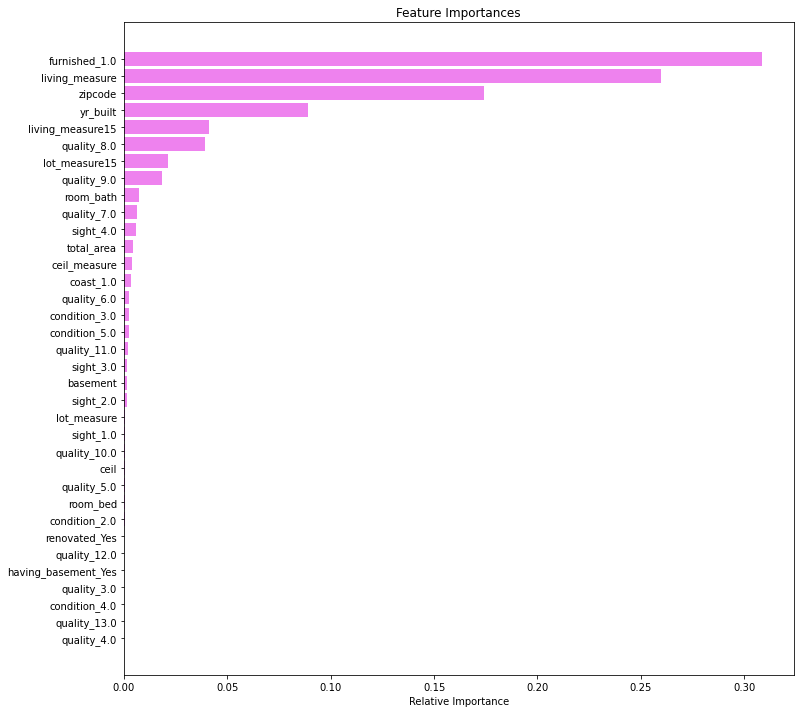

First 15 feature importance:	 60.95061399548778
First 20 feature importance:	 61.96616620927422


In [220]:
importances = GB1.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
#importances[:15].plot.bar(figsize=(plotSizeX, plotSizeY))
print("First 15 feature importance:\t",(importances[:15].sum())*100)
print("First 20 feature importance:\t",(importances[:20].sum())*100)

In [222]:
importances[:20]

array([0.00048218, 0.00719866, 0.25970679, 0.00074886, 0.00058644,
       0.00413457, 0.00136827, 0.08893888, 0.17417685, 0.04124322,
       0.02114312, 0.00446139, 0.00322905, 0.00072262, 0.00136523])

#First 15 features have an importance 61% and first 20 have importance of 62% not very much difference.

Model performance Summary:

Ensemble methods are performing better than linear models. Of all the ensemble models, Gradient boosting regressor is giving better R2 score. we identified top 20 features that are explaining the 75.7% variation in Gradient Boosting regressor model. 

# Building Function/Pipeline for models


In [745]:
from sklearn.pipeline import Pipeline
def result (model,pipe_model,X_train_set,y_train_set,X_test_set,y_test_set):
    pipe_model.fit(X_train_set,y_train_set)
    #predicting result over test data
    y_train_predict= pipe_model.predict(X_train_set)
    y_test_predict= pipe_model.predict(X_test_set)

    trscore=r2_score(y_train_set,y_train_predict)
    trRMSE=np.sqrt(mean_squared_error(y_train_set,y_train_predict))
    trMSE=mean_squared_error(y_train_set,y_train_predict)
    trMAE=mean_absolute_error(y_train_set,y_train_predict)

    testscore=r2_score(y_test,y_test_predict)
    testRMSE=np.sqrt(mean_squared_error(y_test,y_test_predict))
    testMSE=mean_squared_error(y_test,y_test_predict)
    testMAE=mean_absolute_error(y_test,y_test_predict)
    result_df=pd.DataFrame({'Method':[model],'test score':testscore,'RMSE_test':testRMSE,'MSE_test':testMSE,'MSE_test': testMSE,
                          'train Score':trscore,'RMSE_tr': trRMSE,'MSE_tr': trMSE, 'MAE_tr': trMAE})  
    return result_df

In [748]:
#Creating empty dataframe to capture results
result_dff=pd.DataFrame()
pipe_LR = Pipeline([('LR', LinearRegression())])
result_dff=pd.concat([result_dff,result('LR',pipe_LR,X_train,y_train,X_test,y_test)])

pipe_DTR = Pipeline([('DTR', DecisionTreeRegressor())])
result_dff=pd.concat([result_dff,result('DTR',pipe_DTR,X_train,y_train,X_test,y_test)])

pipe_GBR = Pipeline([('GBR', GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1, random_state=22))])
result_dff=pd.concat([result_dff,result('GBR',pipe_GBR,X_train,y_train,X_test,y_test)])

pipe_BGR = Pipeline([('BGR', BaggingRegressor(n_estimators=50, oob_score= True,random_state=14))])
result_dff=pd.concat([result_dff,result('BGR',pipe_BGR,X_train,y_train,X_test,y_test)])

pipe_RFR = Pipeline([('RFR', RandomForestRegressor())])
result_dff=pd.concat([result_dff,result('RFR',pipe_RFR,X_train,y_train,X_test,y_test)])

result_dff

,Method,test score,RMSE_test,MSE_test,train Score,RMSE_tr,MSE_tr,MAE_tr
0,LR,0.666521,214073.772177,4.582758e+10,0.688150,202506.722699,4.100897e+10,133168.984440
0,DTR,0.639957,222436.389626,4.947795e+10,0.999362,9156.813966,8.384724e+07,788.081133
0,GBR,0.822276,156279.365088,2.442324e+10,0.891031,119706.856526,1.432973e+10,81714.660349
0,BGR,0.786562,171263.356294,2.933114e+10,0.972163,60503.597129,3.660685e+09,33865.941023
0,RFR,0.795634,167584.192358,2.808446e+10,0.974084,58378.671525,3.408069e+09,32746.955558
